# Python 数据可视化实战课程 - 数据类型决定图表选择 📊

**课程目标:** 根据数据的变量类型和数量，快速选择最合适的可视化方法，做到"看数据，选图表"。

------

## 第一讲：数据类型识别与图表选择决策树 🌳

**核心思想:** 在动手绘图之前，先了解你的数据。数据的特性，尤其是变量的类型和数量，是选择正确图表的关键。

### 1.1 快速数据类型判断

在 Python 中，我们通常使用 Pandas 库来处理数据。以下是几个核心命令，帮助你快速了解数据集：

- `df.info()`: 提供数据框的整体信息，包括每列的名称、非空值的数量以及数据类型 (Dtype)。这是判断数据类型的首选方法。
- `df.describe()`: 针对数值型列，生成描述性统计信息，如均值、标准差、最小值、最大值和四分位数。对于非数值型列，会提供计数、唯一值等信息。
- `df.dtypes`: 直接显示每列的数据类型。

**示例代码:**

Python

In [2]:
import pandas as pd
import numpy as np

# 创建一个示例 DataFrame
data = {
    'Age': [25, 30, np.nan, 35, 40],
    'Salary': [50000, 60000, 75000, np.nan, 90000],
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin'],
    'JoinDate': pd.to_datetime(['2020-01-01', '2019-05-15', '2021-02-20', '2018-11-30', '2022-07-10']),
    'IsManager': [True, False, True, False, True]
}
df = pd.DataFrame(data)

print("--- df.info() ---")
df.info()

print("\n--- df.describe(include='all', datetime_is_numeric=True) ---")
print(df.describe(include='all', datetime_is_numeric=True))

print("\n--- df.dtypes ---")
print(df.dtypes)

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Age        4 non-null      float64       
 1   Salary     4 non-null      float64       
 2   City       5 non-null      object        
 3   JoinDate   5 non-null      datetime64[ns]
 4   IsManager  5 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(1)
memory usage: 297.0+ bytes

--- df.describe(include='all', datetime_is_numeric=True) ---
              Age   Salary      City             JoinDate IsManager
count    4.000000      4.0         5                    5         5
unique        NaN      NaN         5                  NaN         2
top           NaN      NaN  New York                  NaN      True
freq          NaN      NaN         1                  NaN         3
mean    32.500000  68750.0       NaN  2020-05-21 19:12:00       Na

**讲解:**

- `df.info()` 会告诉你 `Age` 和 `Salary` 有缺失值 (NaN)。`Age` 和 `Salary` 被识别为 `float64` (因为有NaN，整数列会自动转为浮点数)，`City` 是 `object` (通常代表字符串)，`JoinDate` 是 `datetime64[ns]`，`IsManager` 是 `bool`。
- `df.describe()` 提供了数值列的统计摘要，对于 `City` (object类型)，它会给出数量(count)、唯一值(unique)、最高频次的值(top)及其频次(freq)。
- `df.dtypes` 清晰列出了每一列的数据类型。

**常见数据类型:**

- 数值型 (Numerical):

  - **连续型 (Continuous):** 可以取任意数值，如身高、体重、温度、销售额。 (Pandas: `int64`, `float64`)
  - **离散型 (Discrete):** 只能取特定整数值，如年龄、评分次数、班级人数。(Pandas: `int64`)

- 分类型 (Categorical):

   代表类别或标签。

  - **无序型 (Nominal):** 类别间没有内在顺序，如性别 (男/女)、城市 (北京/上海)。(Pandas: `object`, `category`)
  - **有序型 (Ordinal):** 类别间有明确顺序，如教育程度 (小学/中学/大学)、满意度 (差/中/好)。(Pandas: `category` 并指定顺序)

- **时间序列 (Time Series):** 与时间相关的数据点，如每日股价、每月降雨量。(Pandas: `datetime64[ns]`, `timedelta64[ns]`)

- **布尔型 (Boolean):** True/False 值。(Pandas: `bool`)

### 1.2 可视化决策流程

一个简单的决策流程可以帮助你快速定位合适的图表：

1. 步骤1：分析的数值变量有几个？

    (0个 / 1个 / 2个 / 3个 / 多个)

   - 这是最主要的区分标准。

2. 步骤2：数据中是否有分类型变量需要同时考虑？

   - 分类型变量常用于分组、颜色编码或分面。

3. 步骤3：数据中是否有时间序列信息？

   - 时间序列数据通常有其特定的可视化方法（如折线图）。

4. 步骤4：数据量的大小？

   - 少量数据点和大量数据点适合的图表细节可能不同（例如，小数据集可以直接标注数值，大数据集可能需要聚合或抽样）。

### 1.3 图表选择速查表

| **数据类型组合**     | **推荐图表**                 | **Python 实现 (示例库)**                                     | **何时用**                    |
| -------------------- | ---------------------------- | ------------------------------------------------------------ | ----------------------------- |
| **1个数值变量**      | 直方图/密度图/箱线图         | `sns.histplot()`, `sns.kdeplot()`, `sns.boxplot()`           | 查看数据分布、识别异常值      |
| **1个分类变量**      | 条形图/饼图                  | `sns.countplot()`, `plt.pie()`                               | 查看各类别数量/占比           |
| **2个数值变量**      | 散点图/线图                  | `plt.scatter()`, `sns.lineplot()`                            | 探索变量间关系、趋势          |
| **3个数值变量**      | 气泡图/3D散点图              | `plt.scatter(s=size)`, `ax.scatter3D()`                      | 第三维用大小或空间表示        |
| **1数值 + 1分类**    | 箱线图/小提琴图/条形图       | `sns.boxplot()`, `sns.violinplot()`, `sns.barplot()`         | 比较不同类别下数值的分布/均值 |
| **2分类**            | 分组条形图/堆叠条形图/热力图 | `sns.countplot(hue=...)`, `pd.crosstab().plot(kind='bar', stacked=True)`, `sns.heatmap()` | 查看类别组合的频数或关系      |
| **多个数值变量**     | 热力图/成对关系图/平行坐标图 | `sns.heatmap()`, `sns.pairplot()`, `pd.plotting.parallel_coordinates()` | 探索多变量间相关性、整体模式  |
| **时间序列 (1数值)** | 折线图/面积图                | `plt.plot()`, `plt.fill_between()`                           | 查看随时间变化的趋势          |
| **时间序列 + 分类**  | 多系列折线图                 | `sns.lineplot(hue=...)`                                      | 比较不同类别随时间的变化      |

------

## 第二讲：单个数值变量 - 了解数据分布 📈

**核心目标:** 当你手上只有一列连续的数值数据时，主要目的是了解这列数据的分布特征，比如集中趋势、离散程度、是否有偏态、是否存在异常值等。

### 2.1 数据特征：一列连续数值

这通常是数据集中的一个特征列，例如：用户的年龄、产品的价格、某次考试的成绩等。

**示例数据:**

Python

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 示例1: 少量离散的年龄数据
ages = [23, 25, 25, 31, 31, 31, 35, 41, 45, 48, 52, 55, 60, 65, 65]

# 示例2: 大量模拟的学生成绩数据 (正态分布)
np.random.seed(42) # 为了结果可复现
scores = np.random.normal(loc=85, scale=10, size=1000) # 均值85，标准差10

### 2.2 图表选择逻辑与 Python 实现

#### 2.2.1 数据量 < 50 (大致范围)：点图 或 精细条形图 (如果数值是离散的且种类少)

当数据点非常少时，我们可以直接展示每个数据点，或者如果这些点可以归为少数几个离散值，可以用条形图看频次。

- **点图 (Strip Plot / Swarm Plot):** 直接展示每个数据点。
- **何时用：** 数据点非常少，想观察每个具体值及其大致分布，或者避免过度概括。

Python

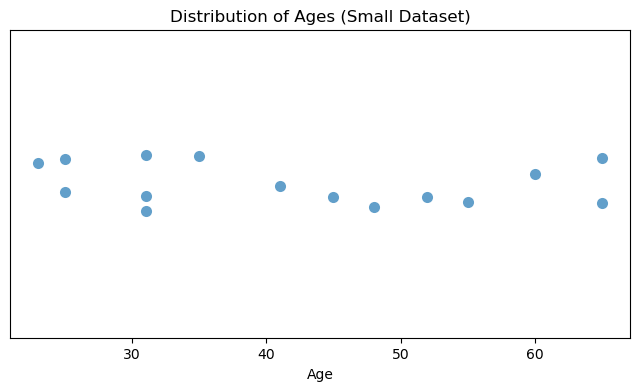

In [4]:
plt.figure(figsize=(8, 4))
sns.stripplot(x=ages, jitter=True, size=8, alpha=0.7) # jitter=True 避免点重叠
plt.title('Distribution of Ages (Small Dataset)')
plt.xlabel('Age')
plt.yticks([]) # 隐藏y轴刻度，因为我们只关心x轴的分布
plt.show()

对于像 `ages` 这样的数据，如果想看每个年龄出现的次数，也可以用频数条形图:

Python

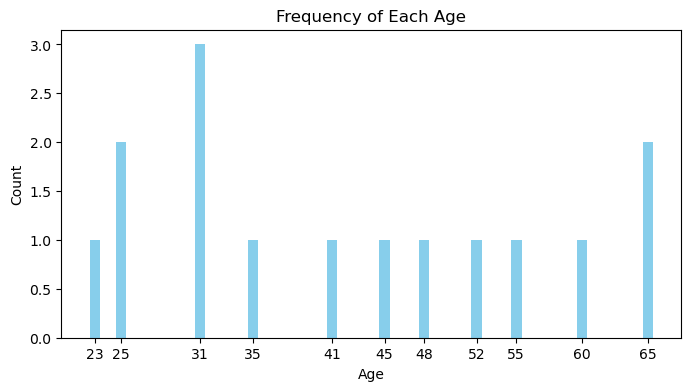

In [5]:
age_counts = pd.Series(ages).value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Frequency of Each Age")
plt.xticks(age_counts.index) #确保每个年龄都显示
plt.show()

#### 2.2.2 数据量 50 - 1000 (大致范围)：直方图 (Histogram)

直方图通过将数据分成若干个“箱子”(bins)，然后统计每个箱子中数据点的数量，来显示数据的分布形状。

- **何时用：** 想了解数据分布的形状（如对称性、偏态、峰态）、集中趋势和离散程度。
- **关键参数：** `bins` (箱子数量) 的选择对直方图的形状影响很大，需要尝试选择合适的值。

Python

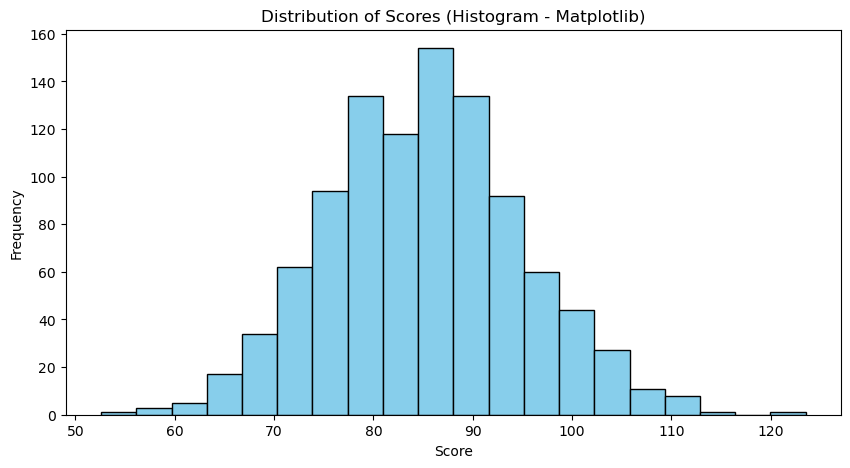

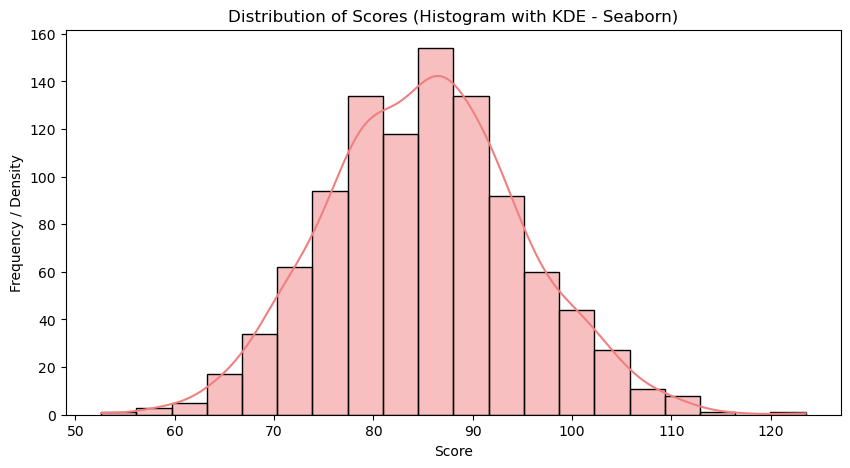

In [6]:
# 使用 Matplotlib
plt.figure(figsize=(10, 5))
plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores (Histogram - Matplotlib)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# 使用 Seaborn (可以同时显示核密度估计 KDE)
plt.figure(figsize=(10, 5))
sns.histplot(scores, bins=20, kde=True, color='lightcoral') # kde=True 会添加一条平滑的密度曲线
plt.title('Distribution of Scores (Histogram with KDE - Seaborn)')
plt.xlabel('Score')
plt.ylabel('Frequency / Density')
plt.show()

#### 2.2.3 数据量 > 1000 (大致范围)：密度图 (Kernel Density Estimate - KDE Plot)

密度图是直方图的平滑版本，它通过核密度估计来估计数据的概率密度函数。

- **何时用：** 数据量较大时，更关注分布的平滑趋势和形状，而不是每个箱子的精确计数。对于比较多个分布也很有用。

Python

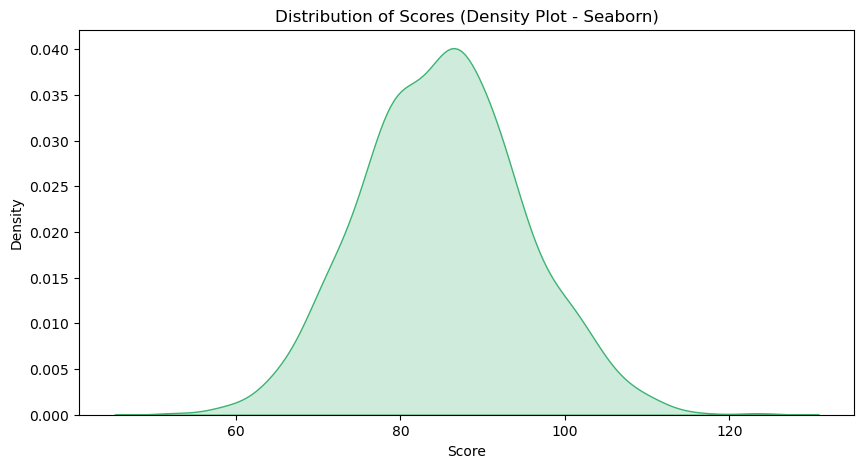

In [7]:
plt.figure(figsize=(10, 5))
sns.kdeplot(scores, fill=True, color='mediumseagreen') # fill=True 填充曲线下方区域
plt.title('Distribution of Scores (Density Plot - Seaborn)')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

**补充：箱线图 (Box Plot) - 也是单个数值变量分析的利器**

箱线图能清晰地展示数据的五数概括（最小值、第一四分位数 Q1、中位数 Q2、第三四分位数 Q3、最大值）以及潜在的异常值。

Python

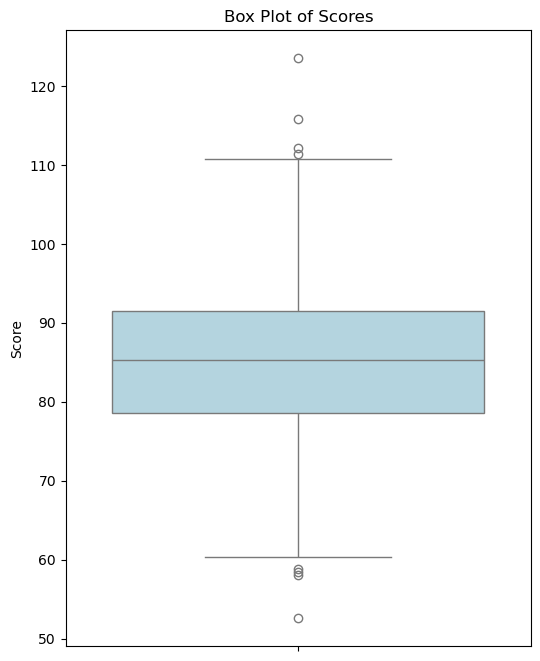

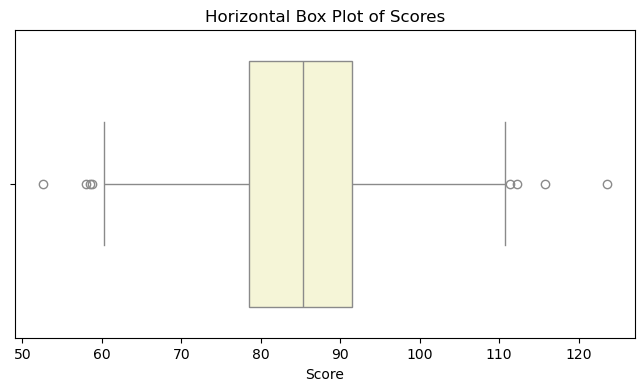

In [8]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=scores, color='lightblue')
plt.title('Box Plot of Scores')
plt.ylabel('Score')
plt.show()

# 如果想横向显示
plt.figure(figsize=(8, 4))
sns.boxplot(x=scores, color='lightgoldenrodyellow')
plt.title('Horizontal Box Plot of Scores')
plt.xlabel('Score')
plt.show()

**箱线图解读:**

- **箱体:** 包含了50%的数据 (从Q1到Q3)。箱体内的横线是中位数。
- **触须 (Whiskers):** 通常延伸到 Q1−1.5×IQR 和 Q3+1.5×IQR 的范围内的数据点 (IQR=Q3−Q1，即四分位距)。
- **异常值 (Outliers):** 超出触须范围的点，通常单独绘制。

### 2.3 实战演练 (思路)

1. 学生成绩分布分析:
   - **数据:** 一列学生成绩。
   - **图表:** 直方图+KDE 查看整体分布，箱线图查看中位数、四分位数和异常高分/低分。
   - **解读:** 判断成绩是正态分布、左偏还是右偏？高分段和低分段学生占比如何？
2. 房价数据分布特征:
   - **数据:** 一列房价数据。
   - **图表:** 由于房价通常是右偏分布（少数极高价格），直方图+KDE，可能需要对数转换 `np.log(prices)` 来观察转换后的分布。箱线图识别高价异常房源。
   - **解读:** 房价主要集中在哪个区间？是否存在大量高价房源拉高均值？
3. 股票收益率分布:
   - **数据:** 一列每日或每月的股票收益率。
   - **图表:** 直方图+KDE。收益率分布通常接近正态，但可能有“肥尾”（极端收益出现的概率比正态分布高）。
   - **解读:** 收益率均值是多少？波动性（标准差）如何？是否有极端亏损或盈利？

------

## 第三讲：两个数值变量 - 寻找关系模式 🔗

**核心目标:** 当你有两列数值数据时，通常想探究它们之间是否存在某种关系，例如正相关、负相关、线性关系、非线性关系，或者它们是否随时间呈现某种趋势。

### 3.1 数据特征：两列数值数据

例如：身高和体重、广告投入和销售额、时间和股价等。

**示例数据:**

Python

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 示例1: 身高和体重 (无时间顺序)
np.random.seed(0)
height = np.random.normal(170, 10, 50) # 均值170，标准差10，50个样本
weight = height * 0.5 - 5 + np.random.normal(0, 5, 50) # 体重与身高大致线性相关，加点噪声

# 示例2: 时间和销售额 (有时间顺序)
dates = pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
                        '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01'])
sales = [100, 110, 105, 120, 130, 125, 140, 150, 145, 160]

# 示例3: 用于多系列对比的数据
df_sales_multi = pd.DataFrame({
    'time': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01'] * 2),
    'value': [10, 12, 15, 8, 10, 9],
    'category': ['A', 'A', 'A', 'B', 'B', 'B']
})

### 3.2 关键判断：是否有时间顺序？

#### 3.2.1 无时间顺序：散点图家族 (Scatter Plot Family)

当两个变量没有内在的时间先后关系时，散点图是首选，它能直观地展示变量间的相关性。

- 基础散点图:

  Python

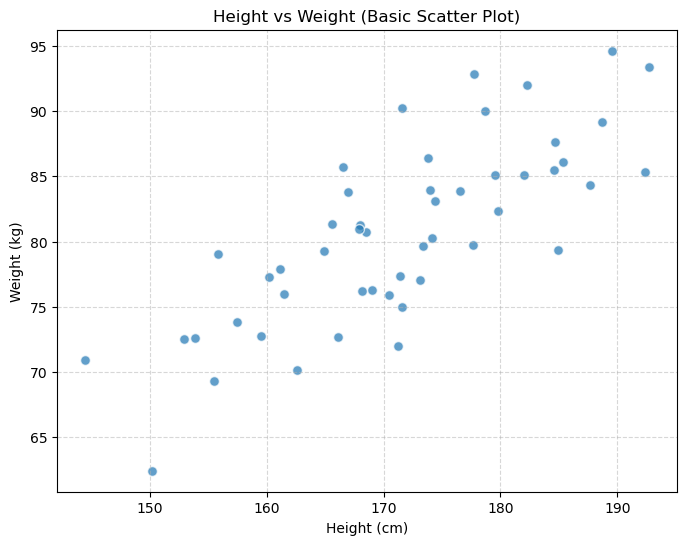

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(height, weight, alpha=0.7, edgecolors='w', s=50) # s是点的大小
plt.title('Height vs Weight (Basic Scatter Plot)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

带趋势线的散点图 (使用 Seaborn):

```
sns.scatterplot()
```

 更灵活，

```
sns.regplot()
```

 可以自动添加线性回归拟合线和置信区间。

Python

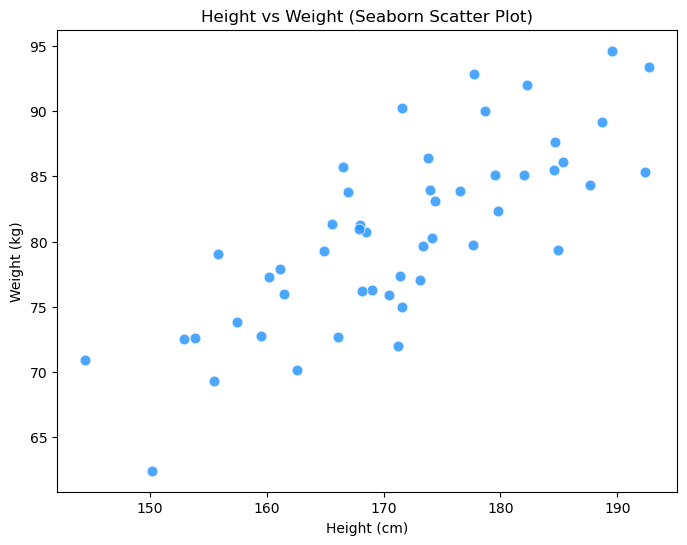

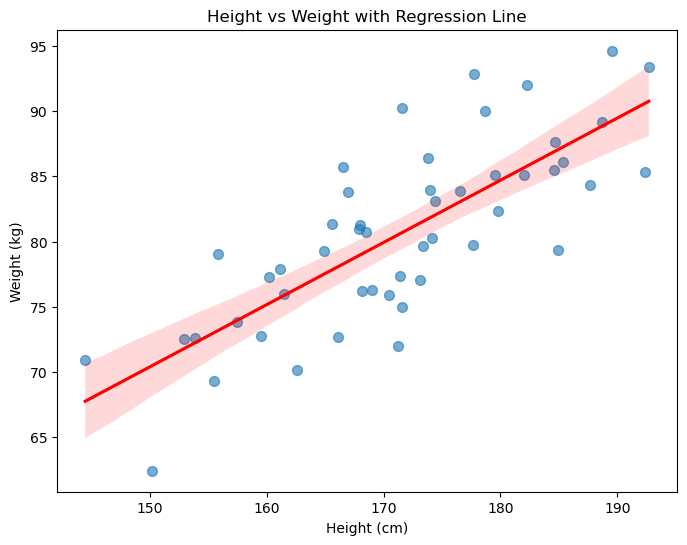

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=height, y=weight, s=60, color='dodgerblue', alpha=0.8)
plt.title('Height vs Weight (Seaborn Scatter Plot)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x=height, y=weight, scatter_kws={'s': 50, 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Height vs Weight with Regression Line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

- 何时用：
  - 分析两个连续变量之间的相关性（正相关、负相关、无相关）。
  - 识别数据点的聚类或模式。
  - 检测异常值。
  - 例如：身高与体重、学习时长与考试成绩、房屋面积与价格等。

#### 3.2.2 有时间顺序：线图家族 (Line Plot Family)

当其中一个变量是时间（或者可以被视为有序的序列），而另一个变量是观测值时，折线图是最佳选择，它能清晰地显示数值随时间的变化趋势。

- 基础折线图:

  Python

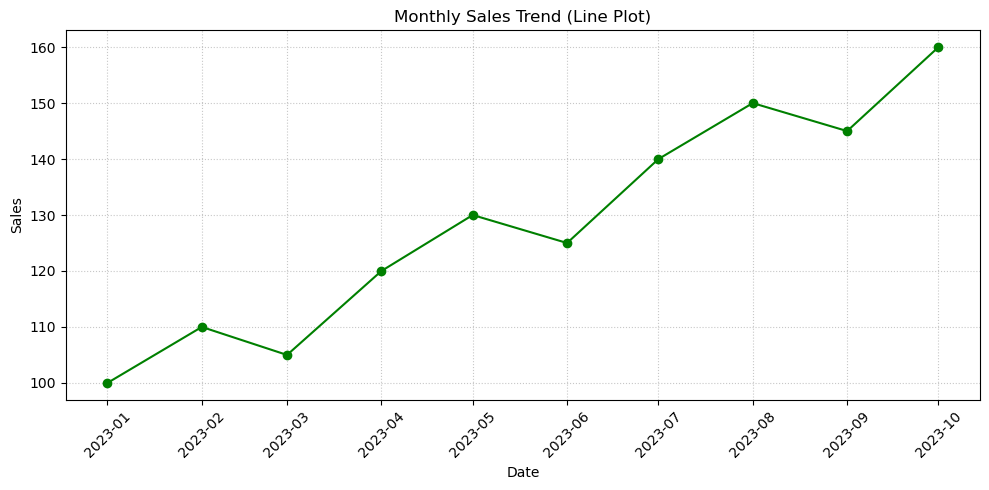

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(dates, sales, marker='o', linestyle='-', color='green') # marker标记数据点
plt.title('Monthly Sales Trend (Line Plot)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45) # 旋转x轴标签，避免重叠
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout() # 调整布局，防止标签被截断
plt.show()

多系列对比 (使用 Seaborn):

当你有多个类别的时间序列数据需要在同一张图上比较时，

```
sns.lineplot()
```

 的 

```
hue
```

 参数非常方便。

Python

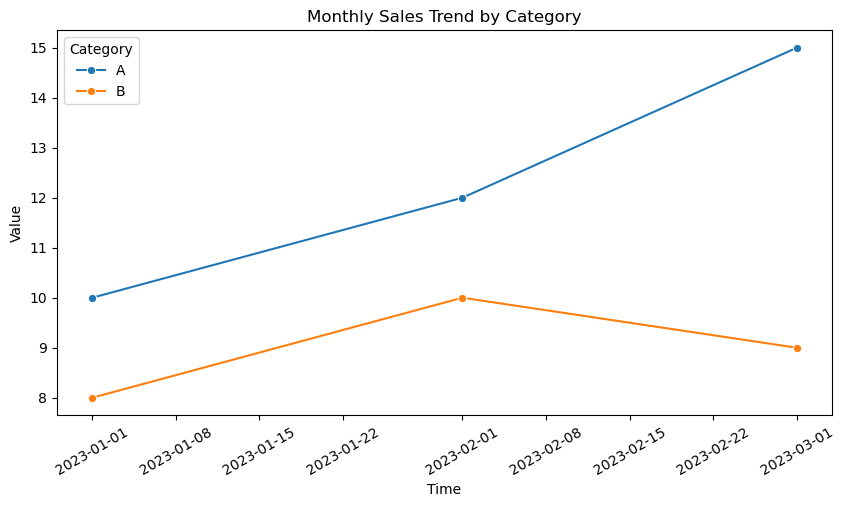

In [13]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sales_multi, x='time', y='value', hue='category', marker='o')
plt.title('Monthly Sales Trend by Category')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=30)
plt.legend(title='Category')
plt.show()

- 何时用：
  - 观察数据随时间变化的趋势、周期性和季节性。
  - 比较不同系列数据随时间的变化。
  - 例如：股票价格走势、月度销售额、每日网站访问量等。

#### 3.2.3 特殊情况：连接散点图 (Scatter plot with connecting lines)

有时，你可能既想展示每个数据点，又想强调它们之间的顺序或路径。

Python

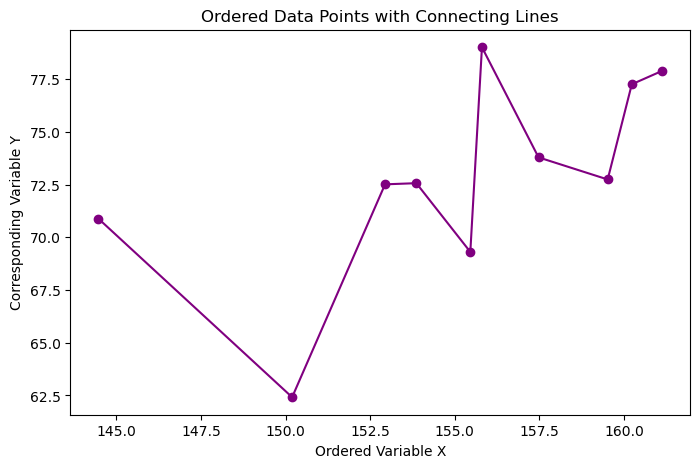

In [14]:
# 假设 x 和 y 是有序的
x_ordered = sorted(height)[:10] #取排序后的前10个身高
y_corresponding = [w for h, w in sorted(zip(height, weight))][:10] #对应的体重

plt.figure(figsize=(8, 5))
plt.plot(x_ordered, y_corresponding, marker='o', linestyle='-', color='purple') # 'o-' 是快捷方式
plt.title('Ordered Data Points with Connecting Lines')
plt.xlabel('Ordered Variable X')
plt.ylabel('Corresponding Variable Y')
plt.show()

- 何时用：** 数据点数量不多，且它们的顺序很重要，比如实验中不同阶段的测量值，或某个物体运动的轨迹点。

### 3.3 数据量影响图表选择

- < 20个点：

   可以考虑在散点图上直接显示数据标签 (每个点的具体数值)。

  Python

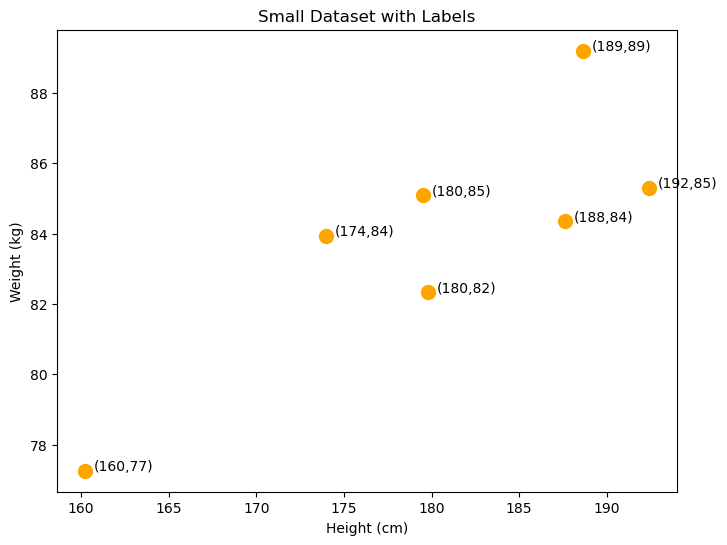

In [15]:
# 假设只有少量数据
height_small = height[:7]
weight_small = weight[:7]
plt.figure(figsize=(8, 6))
plt.scatter(height_small, weight_small, s=100, color='orange')
for i in range(len(height_small)):
    plt.text(height_small[i] + 0.5, weight_small[i], f"({height_small[i]:.0f},{weight_small[i]:.0f})")
plt.title('Small Dataset with Labels')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

- **20-200个点：** 标准的散点图或线图通常效果最好。

- \> 200个点 (甚至上千上万)：

  - 散点图重叠问题：

     点太多会互相遮挡，看不清密度。

    - 解决方法1：调整透明度 `alpha`

      Python

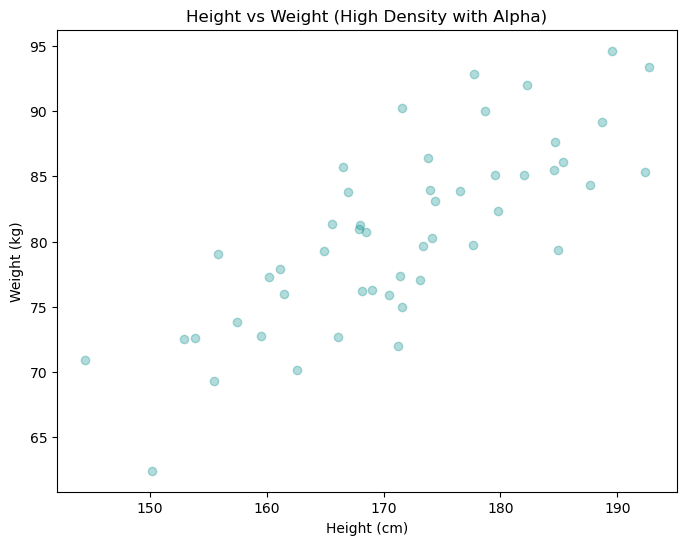

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(height, weight, alpha=0.3, color='darkcyan') # 降低透明度
plt.title('Height vs Weight (High Density with Alpha)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

解决方法2：使用六边形箱图 (Hexbin Plot) 或 2D 密度图

这些图将平面划分为多个区域，用颜色深浅表示区域内数据点的密度。

Python

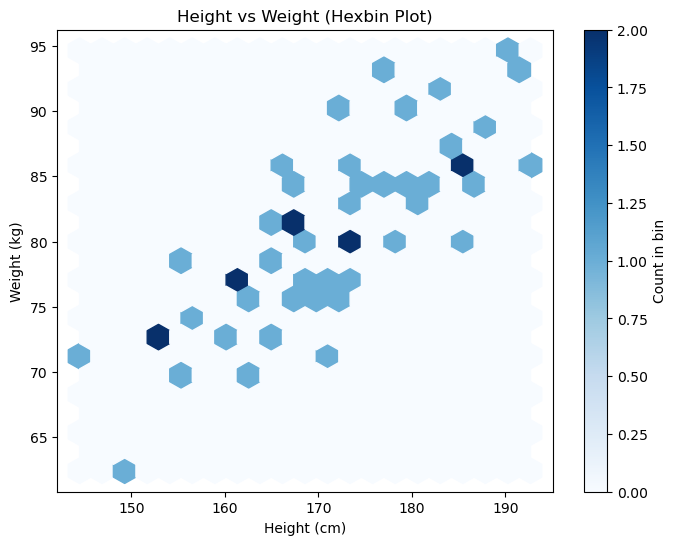

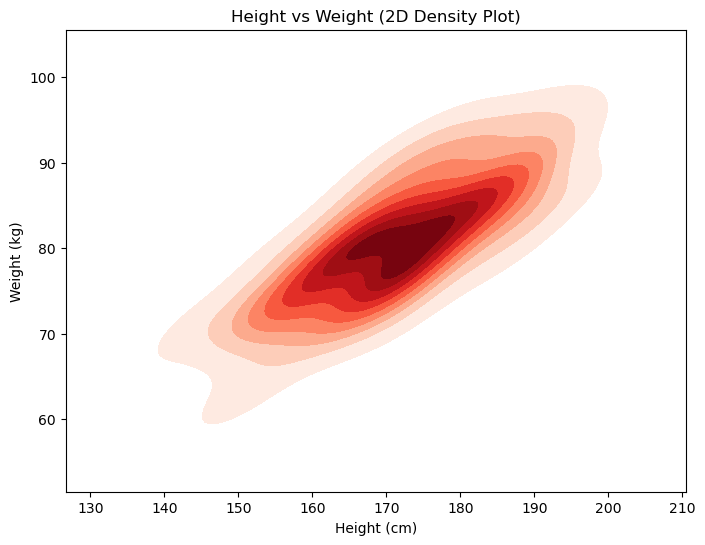

In [17]:
# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(height, weight, gridsize=20, cmap='Blues') # gridsize控制六边形数量
plt.colorbar(label='Count in bin')
plt.title('Height vs Weight (Hexbin Plot)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# 2D Density Plot (KDE Plot) with Seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(x=height, y=weight, cmap="Reds", fill=True, thresh=0.05)
plt.title('Height vs Weight (2D Density Plot)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

### 3.4 实战案例 (思路)

1. 身高体重关系分析:
   - **数据:** 两列，身高和体重。无时间顺序。
   - **图表:** 散点图，可加回归线 (`sns.regplot`)。
   - **解读:** 是否存在正相关？关系是线性的吗？是否有明显的异常群体？
2. 股票价格时间序列:
   - **数据:** 两列，日期和对应的股票收盘价。有时间顺序。
   - **图表:** 折线图。如果有多只股票，用不同颜色的折线图 (`sns.lineplot` with `hue`)。
   - **解读:** 股价的长期趋势是上涨、下跌还是震荡？是否有季节性或周期性波动？
3. 广告投入与销售关系:
   - **数据:** 两列，广告投入金额和对应的销售额。可能无明显时间顺序（如果分析的是不同市场或产品），也可能有（如果分析的是同一产品随时间投入的变化）。
   - 图表:
     - 无时间顺序：散点图，看投入与产出的关系。
     - 有时间顺序（例如，每月投入和当月销售）：两条折线图放在一起对比，或者用散点图看滞后效应。
   - **解读:** 广告投入越多，销售额一定越高吗？是否存在投入的饱和点？

------

## 第四讲：三个数值变量 - 多维信息表达 🎲

**核心目标:** 当你有三列数值数据时，挑战在于如何在二维的屏幕上有效地展示三维信息。目标是揭示三个变量之间的相互作用和模式。

### 4.1 数据特征：三列数值数据

例如：(产品A销量, 产品B销量, 广告支出)，(城市GDP, 城市人口, 城市面积)，(股票价格, 成交量, 涨跌幅)。

**示例数据:**

Python

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # 用于3D绘图
import pandas as pd

np.random.seed(42)
n_points = 50
x_data = np.random.rand(n_points) * 10
y_data = 2 * x_data + np.random.randn(n_points) * 2 + 5
size_data = np.random.rand(n_points) * 1000 + 100 # 代表第三个维度，如数量、权重
color_data = np.random.rand(n_points) * 100     # 代表第三个维度，如温度、强度

df_3d = pd.DataFrame({
    'X_Value': x_data,
    'Y_Value': y_data,
    'Size_Metric': size_data,
    'Color_Metric': color_data
})

### 4.2 表达策略

#### 4.2.1 气泡图：用点的大小表示第三维 (Bubble Chart)

在二维散点图的基础上，用数据点的大小来编码第三个数值变量。

Python

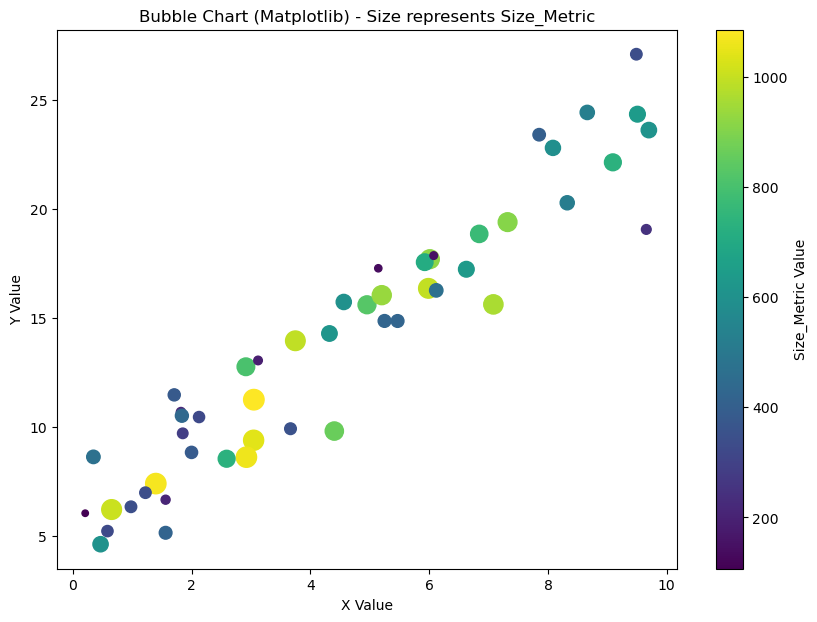

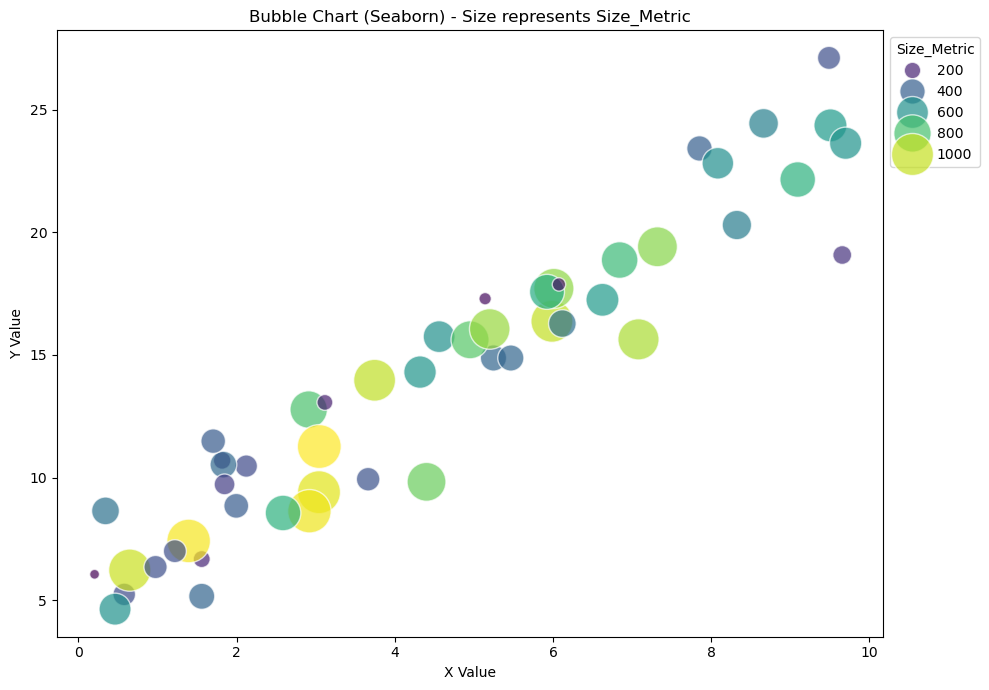

In [21]:
# 使用 Matplotlib
plt.figure(figsize=(10, 7))
plt.scatter(df_3d['X_Value'], df_3d['Y_Value'], s=df_3d['Size_Metric']/5, alpha=0.6, c='skyblue', edgecolors='w')
# s参数直接控制点面积，除以一个因子使气泡大小适中
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Bubble Chart (Matplotlib) - Size represents Size_Metric")
plt.colorbar(plt.scatter(df_3d['X_Value'], df_3d['Y_Value'], s=df_3d['Size_Metric']/5, c=df_3d['Size_Metric'], cmap='viridis'), label='Size_Metric Value') # 添加一个参照的colorbar
plt.show()

# 使用 Seaborn (更推荐，因其 size 参数处理更直观)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_3d, x='X_Value', y='Y_Value', size='Size_Metric',
                sizes=(50, 1000), # 控制气泡大小的最小和最大范围
                alpha=0.7, hue='Size_Metric', palette='viridis') # 用颜色也辅助表示大小
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Bubble Chart (Seaborn) - Size represents Size_Metric")
plt.legend(title='Size_Metric', loc='upper left', bbox_to_anchor=(1, 1)) #调整图例位置
plt.tight_layout()
plt.show()

- **优点：** 直观易懂，能在熟悉的二维平面上增加一个信息维度。
- **缺点：** 如果气泡大小差异过大或数据点过于密集，可能导致遮挡。

#### 4.2.2 颜色映射：用点的颜色强度/色调表示第三维 (Color Mapping)

在二维散点图的基础上，用数据点的颜色来编码第三个数值变量。

Python

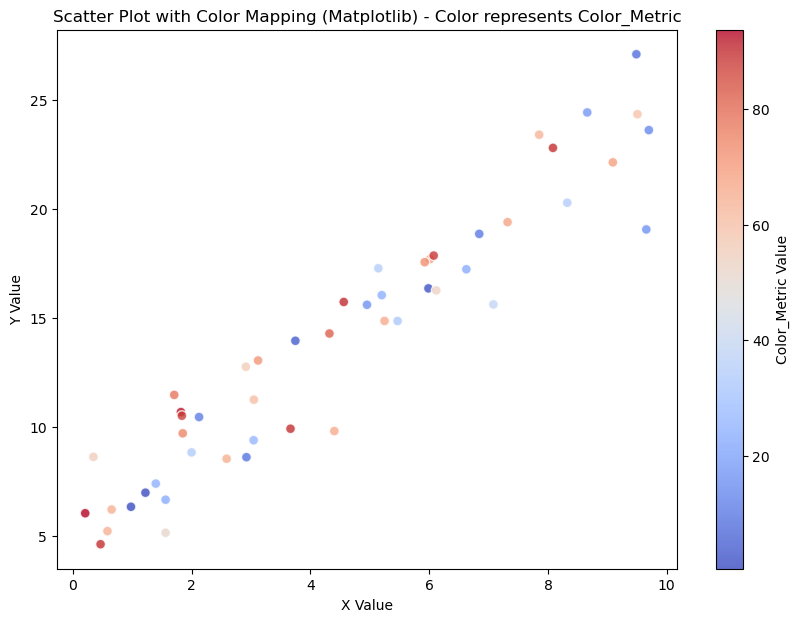

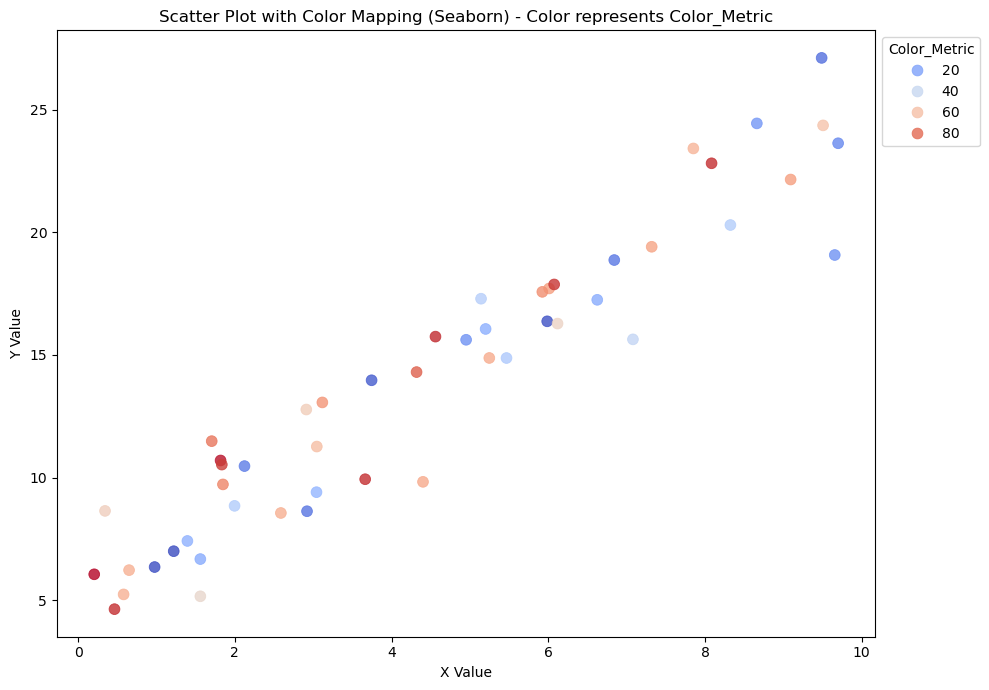

In [22]:
# 使用 Matplotlib
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_3d['X_Value'], df_3d['Y_Value'], c=df_3d['Color_Metric'], cmap='coolwarm', s=50, alpha=0.8, edgecolors='w')
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Scatter Plot with Color Mapping (Matplotlib) - Color represents Color_Metric")
plt.colorbar(scatter, label='Color_Metric Value') # 添加颜色条
plt.show()

# 使用 Seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_3d, x='X_Value', y='Y_Value', hue='Color_Metric',
                palette='coolwarm', s=60, alpha=0.8, edgecolor=None)
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Scatter Plot with Color Mapping (Seaborn) - Color represents Color_Metric")
plt.legend(title='Color_Metric', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

- **优点：** 可以有效展示第三维度的连续变化趋势。
- **缺点：** 颜色差异的感知可能不如大小差异直观，选择合适的 `cmap` (颜色映射表)很重要。

**组合使用：** 你甚至可以同时用大小和颜色表示两个不同的第三/第四维度！

Python

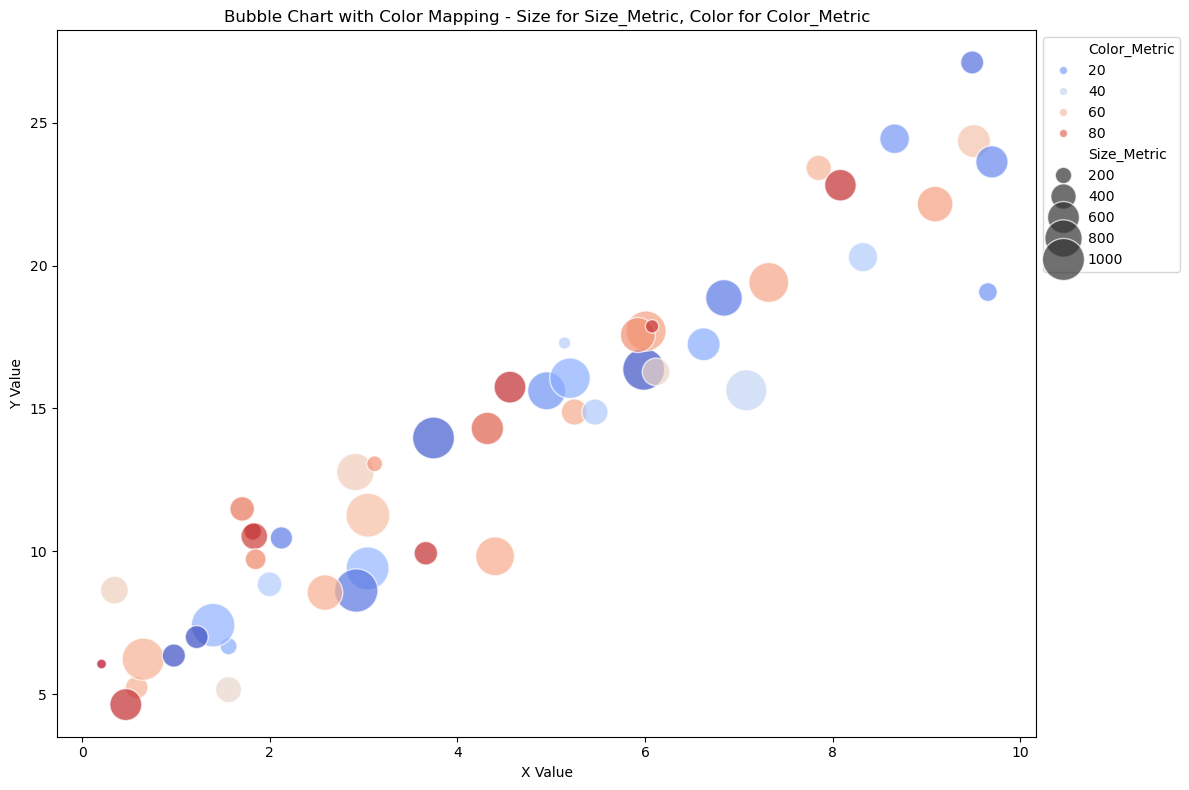

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_3d, x='X_Value', y='Y_Value',
                size='Size_Metric', sizes=(50, 1000),
                hue='Color_Metric', palette='coolwarm',
                alpha=0.7)
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Bubble Chart with Color Mapping - Size for Size_Metric, Color for Color_Metric")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### 4.2.3 3D散点图：真正的三维空间展示 (3D Scatter Plot)

直接将三个数值变量映射到三维空间的X, Y, Z轴。

Python

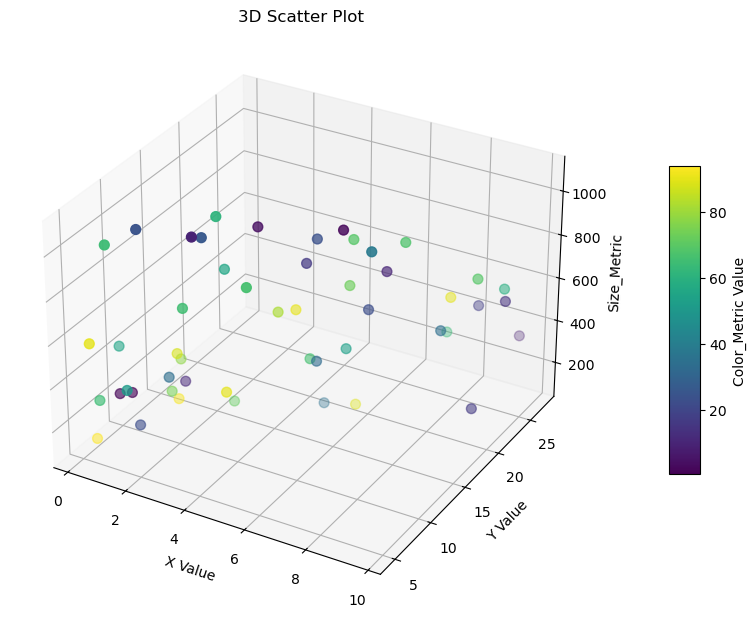

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # 创建一个3D坐标轴

# 使用 Size_Metric 作为 Z 轴
scatter3d = ax.scatter(df_3d['X_Value'], df_3d['Y_Value'], df_3d['Size_Metric'],
                       c=df_3d['Color_Metric'], cmap='viridis', s=50) # 用Color_Metric上色

ax.set_xlabel('X Value')
ax.set_ylabel('Y Value')
ax.set_zlabel('Size_Metric')
ax.set_title('3D Scatter Plot')
fig.colorbar(scatter3d, label='Color_Metric Value', shrink=0.5, aspect=10, pad=0.1)
plt.show()

- **优点：** 真实地展现三维关系，可以旋转视图从不同角度观察。
- 缺点：
  - 在静态图片中，可能因视角问题导致信息遮挡或误解。
  - 不适合印刷品，交互式环境（可旋转）下效果更好。
  - 容易被滥用，如果信息量不大，简单的2D图可能更清晰。

### 4.3 选择原则

- **气泡图 (Size):** 当第三个维度是明确的“**量**”的概念时，如销量、人口、市场份额、频次等，用大小表示比较直观。
- **颜色图 (Color):** 当第三个维度是“**强度**”、“**比率**”或“**类别**”（虽然这里主要讲数值，但有时数值可以分段成有序类别用颜色表示）的概念时，如温度、密度、满意度评分、相关系数等，用颜色表示比较合适。
- **3D散点图:** 当三个维度都是**空间坐标**或物理上的度量，且你确实想探索它们在三维空间中的分布时使用。避免为了“酷炫”而强行使用3D图。

### 4.4 实战案例 (思路)

1. 城市人口、GDP、面积关系:
   - **数据:** X=GDP, Y=人口, 第三个变量=面积。
   - 图表:
     - 气泡图：X=GDP, Y=人口, `size`=面积。看高GDP和高人口的城市是否面积也大。
     - 颜色图：X=GDP, Y=人口, `color`=人均GDP (GDP/人口，需要计算)。
   - **解读:** 是否存在GDP、人口、面积都大的巨型城市？还是有些城市GDP高但面积小（高密度发展）？
2. 股票价格、成交量、涨跌幅 (特定时间点或短期内):
   - **数据:** X=价格, Y=涨跌幅, 第三个变量=成交量。
   - 图表:
     - 气泡图：X=价格 (或价格所处区间), Y=涨跌幅, `size`=成交量。观察放量上涨或放量下跌的股票。
     - 颜色图：X=价格, Y=成交量, `color`=涨跌幅。看不同价格和成交量水平下的涨跌情况。
   - **解读:** 是否成交量大的股票，其涨跌幅也更剧烈？高价股和低价股的成交量与波动性有何不同模式？

------

## 第五讲：多个数值变量 (≥4) - 整体模式识别 🌐

**核心目标:** 当你有四个或更多数值变量时，直接在单个图表中展示所有维度变得非常困难。此时，我们的目标转向探索变量间的两两关系、整体分布模式，或者通过降维技术来可视化。

### 5.1 数据特征：4个以上数值变量

例如：鸢尾花数据集（花萼长度、花萼宽度、花瓣长度、花瓣宽度），学生各科成绩（语文、数学、英语、物理、化学），公司财务指标（营收、利润、资产、负债、现金流）。

**示例数据:**

Python

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # 经典的鸢尾花数据集

# 示例1: 鸢尾花数据
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # 如果需要分类信息

# 示例2: 模拟学生各科成绩 (10个学生, 5门课)
np.random.seed(123)
student_scores_data = np.random.randint(60, 100, size=(10, 5))
subjects = ['语文', '数学', '英语', '物理', '化学']
scores_df = pd.DataFrame(student_scores_data, columns=subjects)
scores_df['student_id'] = [f'Student_{i+1}' for i in range(10)] # 加一个学生ID

### 5.2 可视化策略

#### 5.2.1 相关性分析：热力图 (Heatmap)

热力图通过颜色的深浅来展示一个二维矩阵中的数值大小。在多变量分析中，常用来可视化变量间的**相关系数矩阵**。

Python

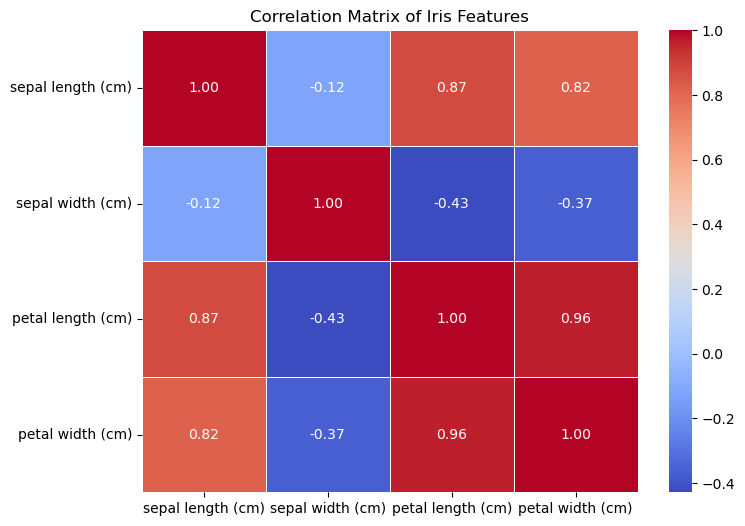

/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 35821 (\N{CJK UNIFIED IDEOGRAPH-8BED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH

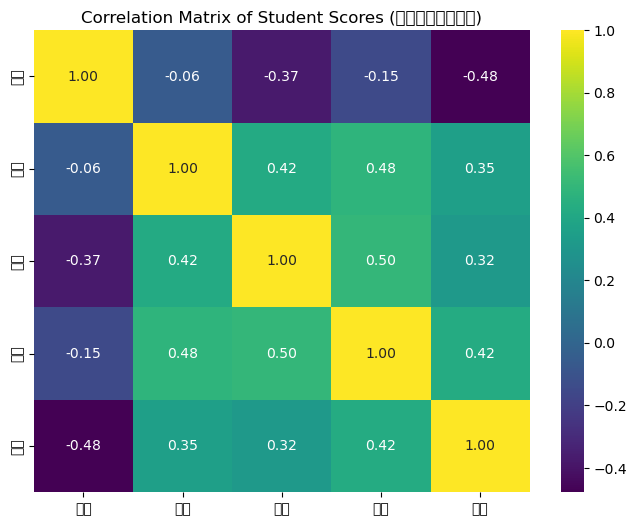

In [26]:
# 计算鸢尾花数据数值特征间的相关系数矩阵
correlation_matrix_iris = iris_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_iris, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# annot=True: 在格子上显示数值
# cmap='coolwarm': 使用冷暖色调，红色表示正相关，蓝色表示负相关
# fmt=".2f": 格式化输出的数字，保留两位小数
# linewidths: 格子间的线条宽度
plt.title('Correlation Matrix of Iris Features')
plt.show()

# 计算学生成绩的相关系数矩阵
correlation_matrix_scores = scores_df[subjects].corr()
plt.figure(figsize=(8, 6))

# plt.rcParams['font.sans-serif'] = ['SimHei'] # 例如，设置中文字体为黑体 (需确保系统有此字体)
# plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题
sns.heatmap(correlation_matrix_scores, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Student Scores (科目相关性热力图)')
plt.show()

- 何时用：
  - 快速了解多个数值变量两两之间的线性相关性强度和方向。
  - 识别高度相关的变量（可能存在多重共线性问题）。
  - 发现不相关的变量。

#### 5.2.2 整体分布与两两关系：成对图/散点图矩阵 (Pair Plot / Scatter Plot Matrix)

成对图会展示数据集中每对数值变量之间的散点图，以及每个变量自身的分布图（通常是直方图或密度图）。

Python

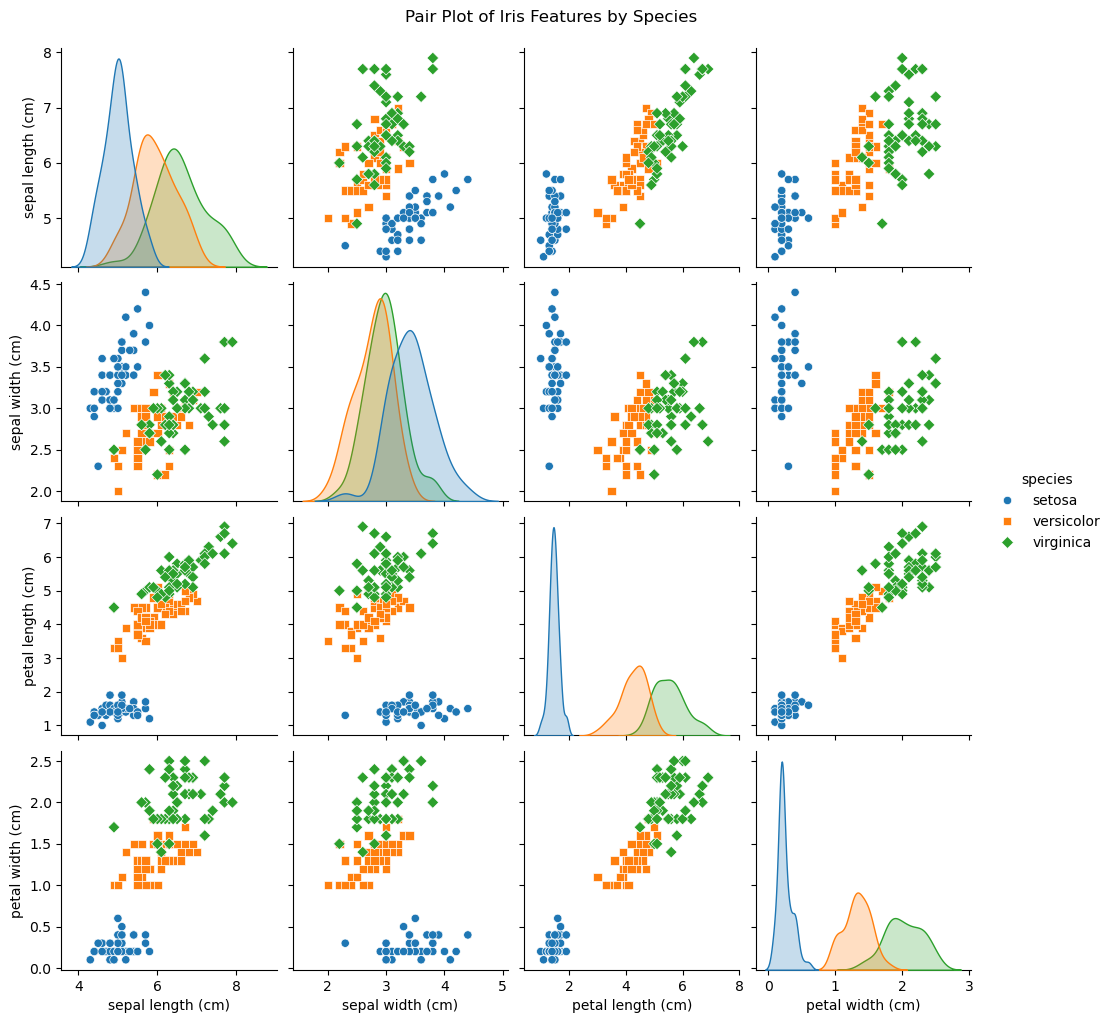

In [27]:
# 对鸢尾花数据制作成对图
# sns.pairplot(iris_df) # 基本用法
# plt.suptitle('Pair Plot of Iris Features', y=1.02) # y=1.02 调整总标题位置
# plt.show()

# 可以加入分类变量用颜色区分 (如果数据中有分类列)
iris_df_with_species = iris_df.copy()
iris_df_with_species['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

sns.pairplot(iris_df_with_species, hue='species', diag_kind='kde', markers=["o", "s", "D"])
# hue='species': 根据species列用不同颜色标记
# diag_kind='kde': 对角线上用核密度估计图代替直方图
# markers: 为不同类别指定不同的点样式
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()

# 对学生成绩数据制作成对图 (可能意义不大，因为变量间关系不一定像物理特征那样明确)
# sns.pairplot(scores_df[subjects], diag_kind='hist')
# plt.suptitle('Pair Plot of Student Scores', y=1.02)
# plt.show()

- 何时用：
  - 探索性数据分析 (EDA) 的早期阶段，快速概览所有数值变量的分布及其两两关系。
  - 目视检查变量间的线性/非线性关系、聚类等。
  - 变量数量不宜过多（例如超过10-15个），否则图像会非常小且难以辨认。

#### 5.2.3 模式识别与比较：平行坐标图 (Parallel Coordinates Plot)

平行坐标图将每个数据点表示为一条穿过多个平行轴的折线，每个轴代表一个变量。

Python

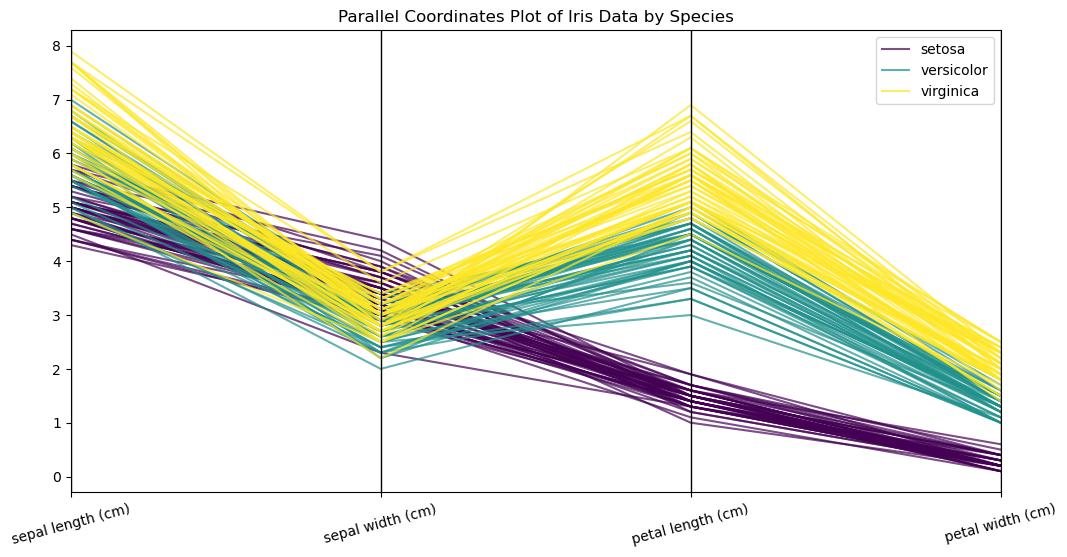

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32489 (\N{CJK UNIFIED IDEOGRAPH-7EE9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaV

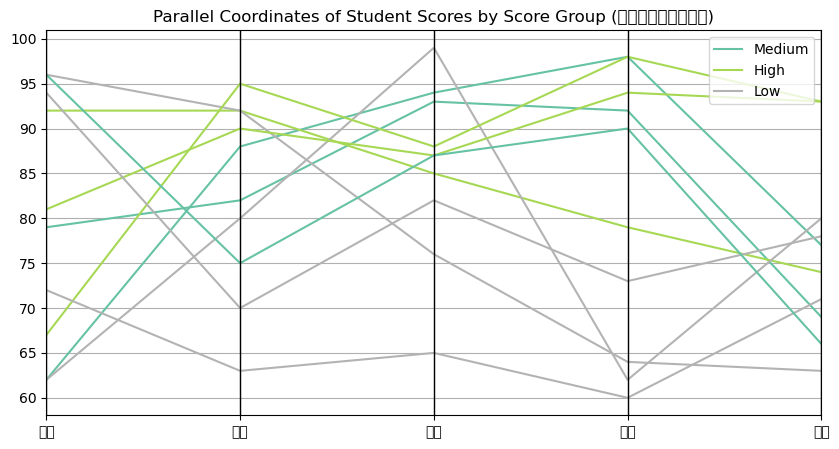

In [28]:
from pandas.plotting import parallel_coordinates

# 平行坐标图对鸢尾花数据 (按种类上色)
plt.figure(figsize=(12, 6))
parallel_coordinates(iris_df_with_species, 'species', colormap='viridis', linewidth=1.5, alpha=0.7)
plt.title('Parallel Coordinates Plot of Iris Data by Species')
plt.xticks(rotation=15) #轻微旋转轴标签，如果它们太密集
plt.grid(False) # 通常平行坐标图不带背景格网
plt.show()

# 平行坐标图对部分学生成绩 (可以用来比较高分/低分学生的模式)
# 假设我们按总分高低给学生分类
scores_df['Total_Score'] = scores_df[subjects].sum(axis=1)
scores_df['Score_Group'] = pd.qcut(scores_df['Total_Score'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 5))
# 选择要展示的科目和分类列
parallel_coordinates(scores_df[['语文', '数学', '英语', '物理', '化学', 'Score_Group']],
                     'Score_Group', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates of Student Scores by Score Group (学生成绩分数组模式)')
plt.show()

- 何时用：
  - 可视化高维数据，尤其是当你想比较不同类别（`class_column`）在各个维度上的表现模式时。
  - 识别变量间的潜在关系或聚类。
  - 寻找异常数据点（与其他线条模式显著不同的线条）。
- **注意：** 变量的顺序会影响图的可读性。可能需要对变量进行标准化 (scaling)，如果它们的取值范围差异很大。

### 5.3 数据降维可视化 (Brief Mention)

当变量维度过高时，可以将数据投影到较低维度空间（通常是2D或3D）进行可视化。

- **主成分分析 (PCA):** 一种常用的线性降维方法，找到数据变异最大的方向（主成分）。
- **t-SNE (t-distributed Stochastic Neighbor Embedding):** 一种非线性降维方法，擅长可视化高维数据的聚类结构。
- **UMAP (Uniform Manifold Approximation and Projection):** 另一种强大的非线性降维方法，通常比t-SNE快，且能更好地保留全局结构。

**示例思路 (PCA):**

Python

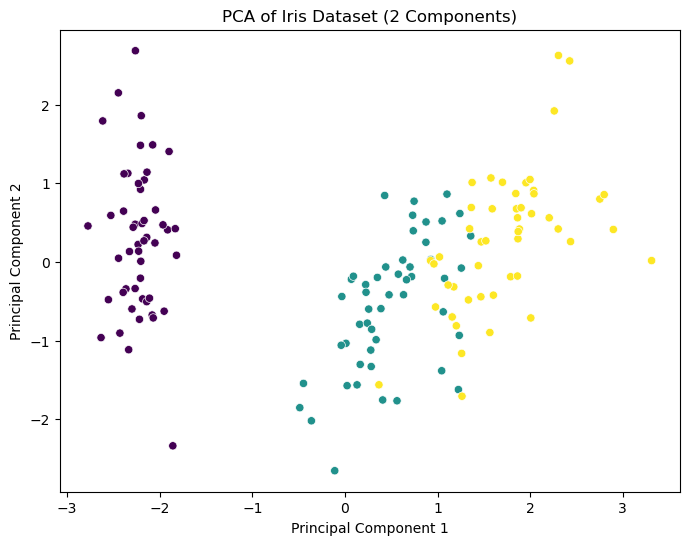

Explained variance ratio by PC1: 0.73
Explained variance ratio by PC2: 0.23


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. 标准化数据 (对PCA很重要)
features_to_scale = iris_df.columns # 如果有非数值列，要先去掉
x_scaled = StandardScaler().fit_transform(iris_df[features_to_scale])

# 2. 应用PCA
pca = PCA(n_components=2) # 降到2维
principal_components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 如果有类别信息，可以加上
# pca_df['species'] = iris_df_with_species['species'] # 确保行对应

# 3. 可视化降维后的数据
plt.figure(figsize=(8, 6))
# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species') # 如果有species列
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'],
                c=iris.target, cmap='viridis') # 用原始target上色
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2 Components)')
plt.show()

print(f"Explained variance ratio by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance ratio by PC2: {pca.explained_variance_ratio_[1]:.2f}")

- **何时用：** 变量实在太多，上述图表都难以处理时，作为一种探索手段，看能否在低维空间发现结构。

### 5.4 实战案例 (思路)

1. 鸢尾花数据探索:
   - **数据:** 4个数值特征 + 1个分类（种类）。
   - 图表:
     - 相关性热力图：看哪些花萼/花瓣特征相关性高。
     - 成对图 (`sns.pairplot` with `hue='species'`)：这是鸢尾花数据的经典可视化，能清晰看到不同种类在特征两两组合下的分布和区分度。
     - 平行坐标图：比较三个种类在四个特征上的整体轮廓。
     - PCA降维图：看能否在2D平面上很好地区分三个种类。
   - **解读:** 不同种类的鸢尾花在哪些特征上差异最明显？哪些特征组合最能区分它们？
2. 学生成绩多维分析:
   - **数据:** 多个科目的成绩。
   - 图表:
     - 相关性热力图：看不同科目成绩间的相关性（例如，物理好的数学是否也好？）。
     - 平行坐标图：可以按总分或特定科目优秀程度给学生分组，然后比较不同组学生在各科上的表现模式。
     - （如果学生很多）PCA：看能否发现一些潜在的“学生类型”（例如，文科型、理科型、均衡型），但这需要结合实际意义解读主成分。
   - **解读:** 科目之间是否存在普遍的关联性？高分学生和低分学生在各科成绩上的模式有何不同？

------

## 第六讲：分类变量 + 数值变量 - 分组比较分析 📊🆚🔢

**核心目标:** 当数据中同时包含分类变量和数值变量时，我们通常希望比较不同类别下数值变量的分布特征（如均值、中位数、离散程度、形状等）。

### 6.1 数据特征：有分类列 + 数值列

- **分类列 (Categorical):** 定义了不同的组别，如产品类别、用户性别、实验组/对照组。
- **数值列 (Numerical):** 我们希望在不同组别间进行比较的度量，如销售额、评分、反应时间。

**示例数据:**

Python

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
np.random.seed(101)
data = {
    'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'D', 'D', 'D'],
    'value': np.random.randn(15) * 10 + 50, # 均值50，有一些波动
    'group': ['X', 'X', 'X', 'Y', 'Y', 'Y', 'X', 'X', 'X', 'Y', 'Y', 'Y', 'X', 'Y', 'X'],
    'sub_category': ['S1', 'S1', 'S2', 'S2', 'S1', 'S2', 'S1', 'S2', 'S1', 'S2', 'S1', 'S1', 'S2', 'S1', 'S2']
}
df = pd.DataFrame(data)

# 为小提琴图和箱线图生成更适合展示分布差异的数据
tips = sns.load_dataset('tips') # Seaborn自带的小费数据集
# 'day': 周四/周五/周六/周日 (分类)
# 'total_bill': 总消费金额 (数值)
# 'sex': Male/Female (分类)

### 6.2 单分类变量情况 (1个分类变量 + 1个数值变量)

#### 6.2.1 分类数 ≤ 5 (大致)：条形图 / 箱线图 / 小提琴图

- 条形图 (Bar Plot): 显示均值 (或其他聚合统计量)

  条形图的高度代表了每个类别下数值变量的均值（默认）或中位数、标准差等（可通过 

  ```
  estimator
  ```

   参数指定）。通常会带有置信区间（误差棒）。

  Python

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/3606253284.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='category', y='value', data=df, palette='pastel', ci='sd') # ci='sd' 显示标准差
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/3606253284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='value', data=df, palette='pastel', ci='sd') # ci='sd' 显示标准差


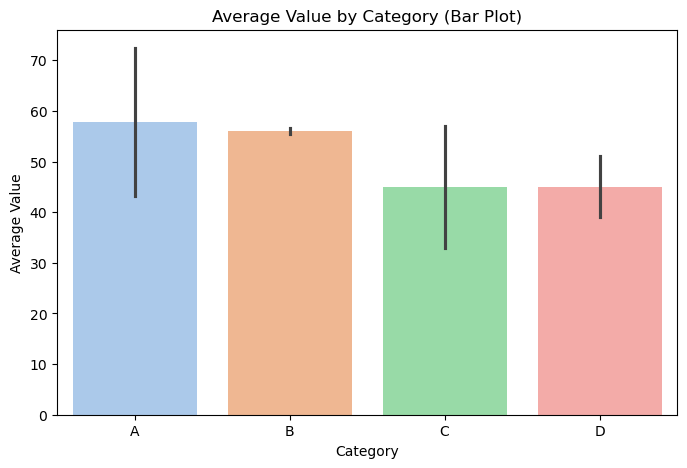

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/3606253284.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_bill', data=tips, palette='viridis')


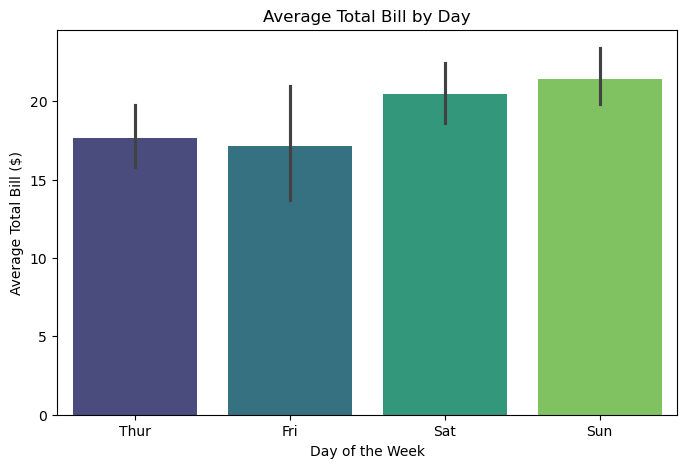

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x='category', y='value', data=df, palette='pastel', ci='sd') # ci='sd' 显示标准差
plt.title('Average Value by Category (Bar Plot)')
plt.ylabel("Average Value")
plt.xlabel("Category")
plt.show()

# 比较不同天的平均总消费
plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='total_bill', data=tips, palette='viridis')
plt.title('Average Total Bill by Day')
plt.ylabel("Average Total Bill ($)")
plt.xlabel("Day of the Week")
plt.show()

箱线图 (Box Plot): 显示分布的五数概括和异常值

箱线图能清晰地展示每个类别下数值变量的分布情况，包括中位数、四分位数范围、异常值。非常适合比较不同组的分布。

Python

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/3215200143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='value', data=df, palette='Set2')


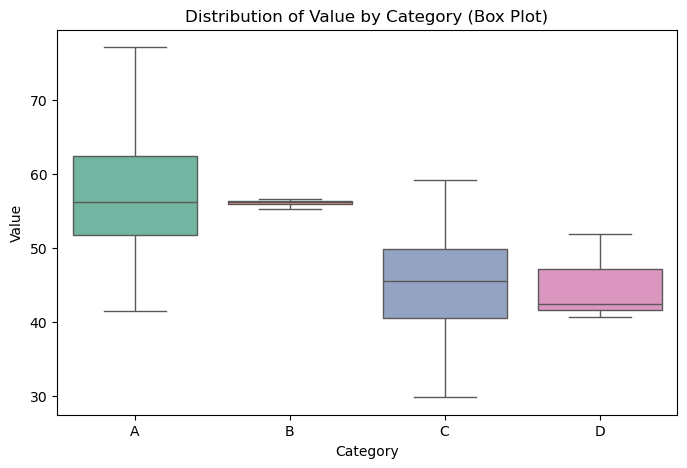

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/3215200143.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=tips, palette='coolwarm')


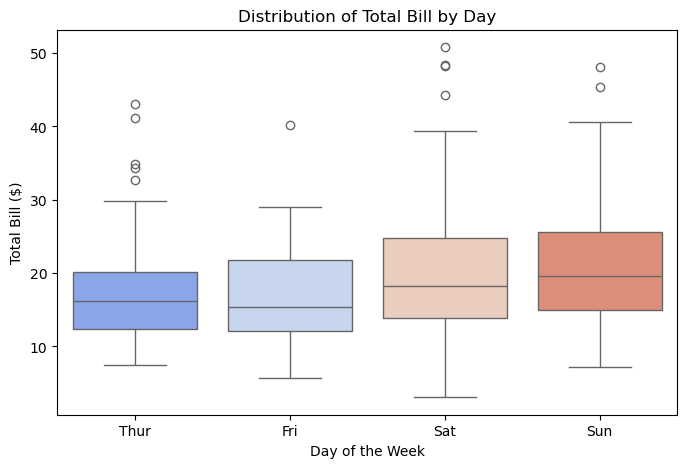

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='category', y='value', data=df, palette='Set2')
plt.title('Distribution of Value by Category (Box Plot)')
plt.ylabel("Value")
plt.xlabel("Category")
plt.show()

# 比较不同天的总消费分布
plt.figure(figsize=(8, 5))
sns.boxplot(x='day', y='total_bill', data=tips, palette='coolwarm')
plt.title('Distribution of Total Bill by Day')
plt.ylabel("Total Bill ($)")
plt.xlabel("Day of the Week")
plt.show()

小提琴图 (Violin Plot): 箱线图 + 核密度估计

小提琴图结合了箱线图和密度图的特点。中间可以是箱线图或点，两侧是该类别数值的核密度估计，能更形象地展示分布的形状。

Python

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/1096184065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='value', data=df, palette='husl', inner='quartile') # inner='quartile' 显示四分位数


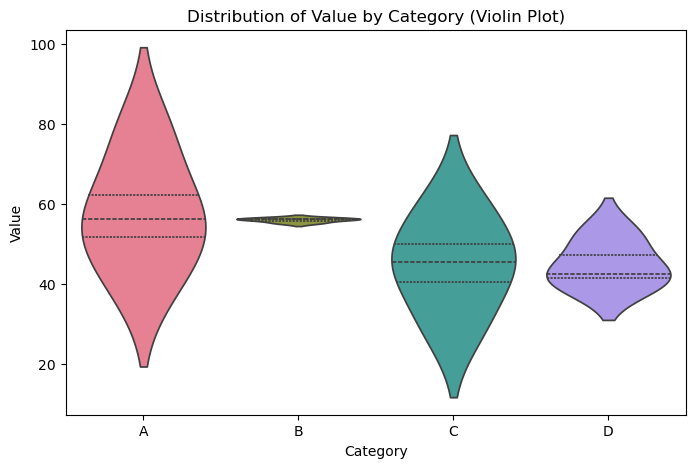

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/1096184065.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day', y='total_bill', data=tips, palette='muted', inner='box') # inner='box' 在小提琴内部画箱线图


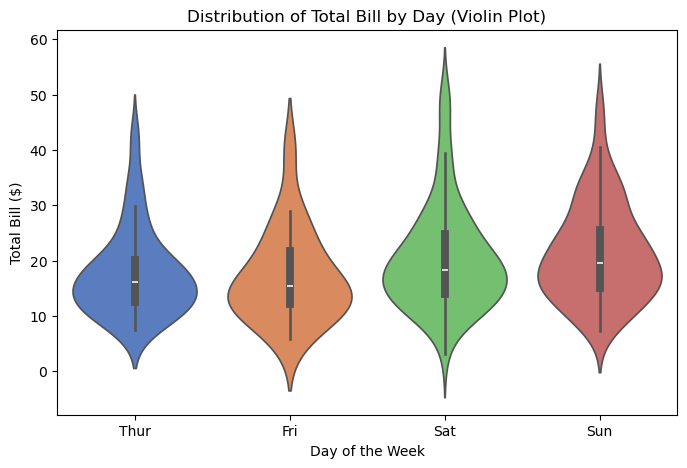

In [33]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='category', y='value', data=df, palette='husl', inner='quartile') # inner='quartile' 显示四分位数
plt.title('Distribution of Value by Category (Violin Plot)')
plt.ylabel("Value")
plt.xlabel("Category")
plt.show()

# 比较不同天的总消费分布 (小提琴图)
plt.figure(figsize=(8, 5))
sns.violinplot(x='day', y='total_bill', data=tips, palette='muted', inner='box') # inner='box' 在小提琴内部画箱线图
plt.title('Distribution of Total Bill by Day (Violin Plot)')
plt.ylabel("Total Bill ($)")
plt.xlabel("Day of the Week")
plt.show()

#### 6.2.2 分类数 > 5：考虑合并类别、旋转标签或使用水平条形图

当分类变量的类别过多时，x轴标签容易重叠。

- 旋转标签:

  Python

In [35]:
# 假设df_many_categories有很多类别
# sns.barplot(x='many_categories_column', y='value_column', data=df_many_categories)
# plt.xticks(rotation=45, ha='right') # ha='right' 确保标签对齐刻度
# plt.tight_layout()
# plt.show()

水平条形图:

 将x和y轴对调，类别标签在y轴上，可以容纳更多标签。

Python

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_10707/3344538146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value', y='category', data=df, palette='pastel', orient='h') # orient='h' for horizontal


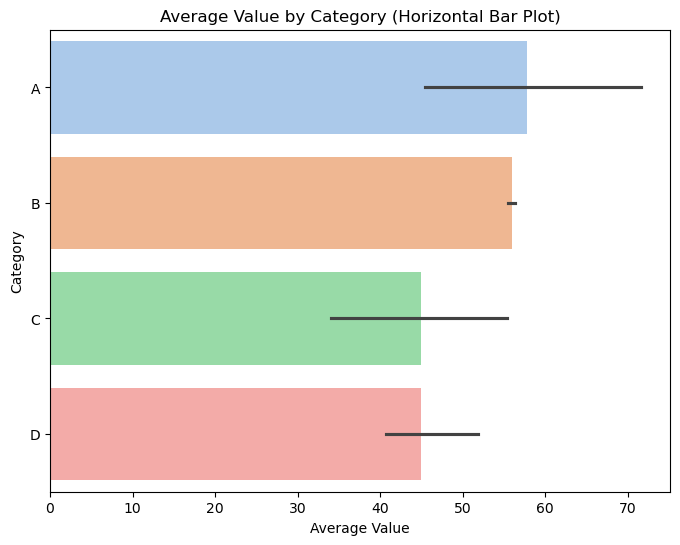

In [36]:
plt.figure(figsize=(8, 6)) # 可能需要更宽的图
sns.barplot(x='value', y='category', data=df, palette='pastel', orient='h') # orient='h' for horizontal
plt.title('Average Value by Category (Horizontal Bar Plot)')
plt.xlabel("Average Value")
plt.ylabel("Category")
plt.show()

- 合并类别:** 如果某些类别数量很少或者性质相似，可以考虑将它们合并成一个“其他”类别或更大的类别。

### 6.3 多分类变量情况 (例如 2个分类变量 + 1个数值变量)

#### 6.3.1 嵌套分组：分组条形图 (Grouped Bar Plot) / 分组箱线图等

使用 `hue` 参数，将第二个分类变量引入，形成分组比较。

Python

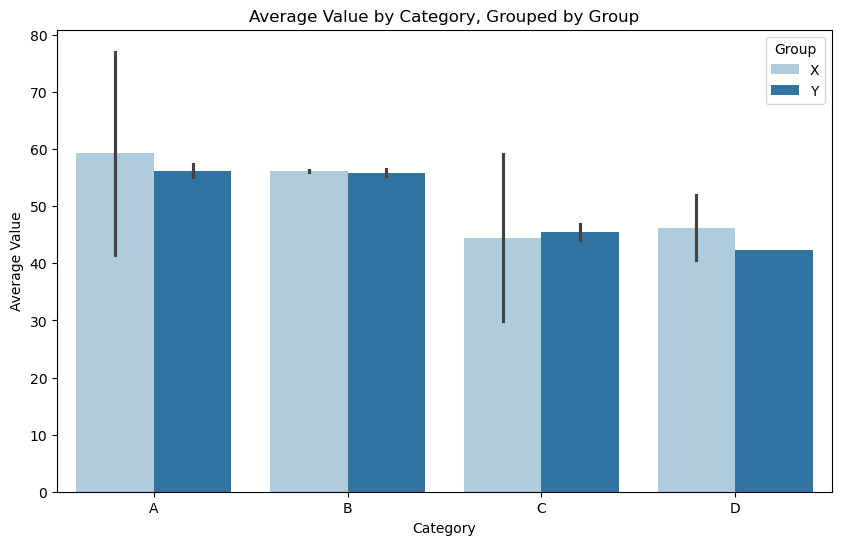

ValueError: 'gender' is not a valid palette name

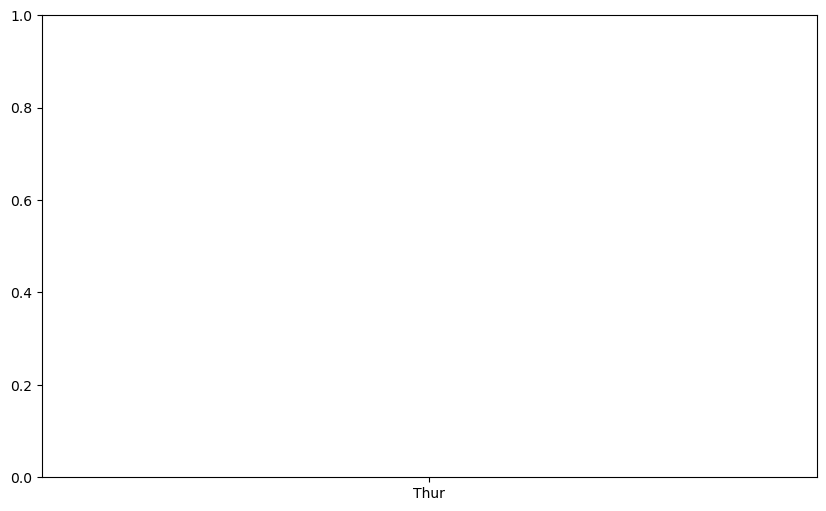

In [34]:
# 分组条形图: 比较不同 'category' 下，不同 'group' 的 'value' 均值
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='value', hue='group', data=df, palette='Paired')
plt.title('Average Value by Category, Grouped by Group')
plt.ylabel("Average Value")
plt.xlabel("Category")
plt.legend(title='Group')
plt.show()

# 分组箱线图: 比较不同 'day' 下，不同 'sex' 的 'total_bill' 分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips, palette='gender') # Seaborn 2024.7+ 可能用 'gender' palette
plt.title('Total Bill Distribution by Day, Grouped by Sex')
plt.ylabel("Total Bill ($)")
plt.xlabel("Day of the Week")
plt.legend(title='Sex')
plt.show()

#### 6.3.2 面板图/分面显示 (Facet Grid)

使用 `sns.catplot()` (或 `relplot`, `displot`) 结合 `col` 或 `row` 参数，为第二个（或更多）分类变量的每个类别创建一个子图。

Python

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/351800382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='category', y='value', col='group', data=df, kind='bar', palette='viridis', height=4, aspect=1.2)


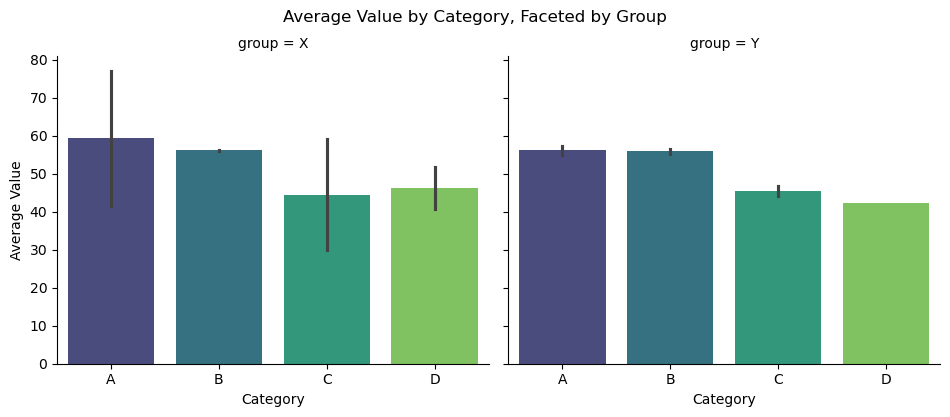

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/351800382.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='day', y='total_bill', col='time', row='sex', data=tips, kind='box', palette='Spectral', height=3.5, aspect=1)


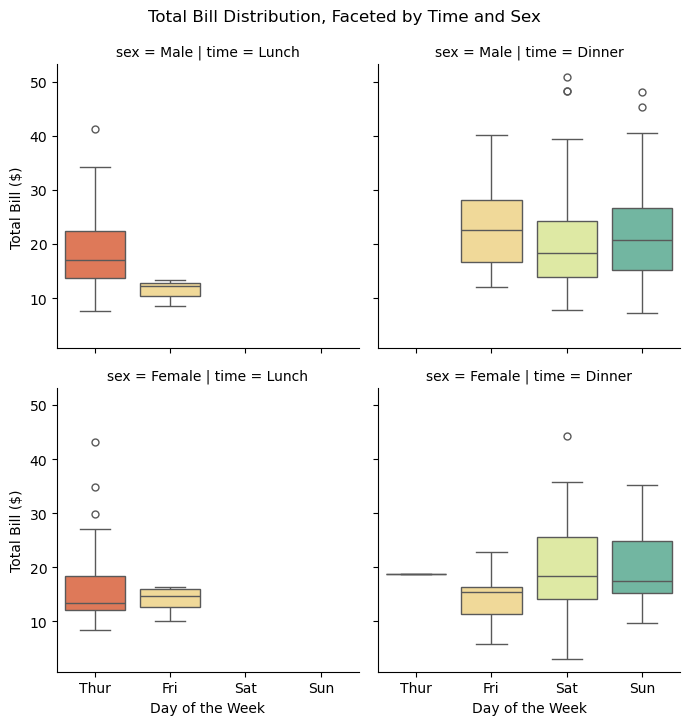

In [35]:
# 使用 catplot 进行分面条形图
# col='group' 会为 'group' 列的每个唯一值创建一个子图面板
g = sns.catplot(x='category', y='value', col='group', data=df, kind='bar', palette='viridis', height=4, aspect=1.2)
# kind 可以是 'bar', 'box', 'violin', 'strip', 'swarm' 等
g.fig.suptitle('Average Value by Category, Faceted by Group', y=1.03) # 总标题
g.set_axis_labels("Category", "Average Value")
plt.show()

# 使用 catplot 进行分面箱线图
g = sns.catplot(x='day', y='total_bill', col='time', row='sex', data=tips, kind='box', palette='Spectral', height=3.5, aspect=1)
# col='time' (Lunch/Dinner), row='sex' (Male/Female)
g.fig.suptitle('Total Bill Distribution, Faceted by Time and Sex', y=1.03)
g.set_axis_labels("Day of the Week", "Total Bill ($)")
plt.show()

### 6.4 特殊图表 (进一步细化单分类变量的比较)

#### 6.4.1 蜂群图 (Swarm Plot): 显示所有数据点，避免重叠

当数据点不多时，蜂群图将每个点都画出来，并调整它们的位置以避免重叠，同时能看出分布的形状。

Python

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/1589557759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='day', y='total_bill', data=tips, palette='Set2', size=4) # size 调整点的大小


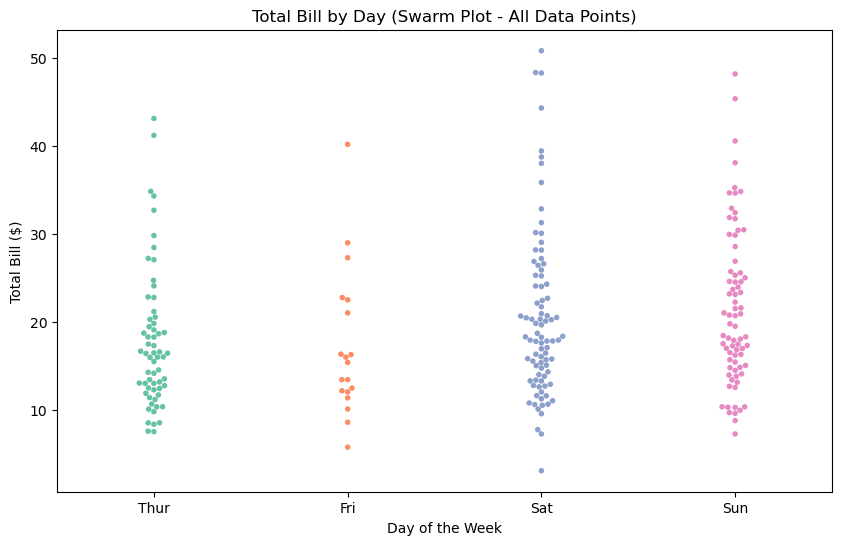

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_34570/1589557759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day', y='total_bill', data=tips, palette='lightgray', inner=None) # inner=None 去掉小提琴内部


ValueError: 'lightgray' is not a valid palette name

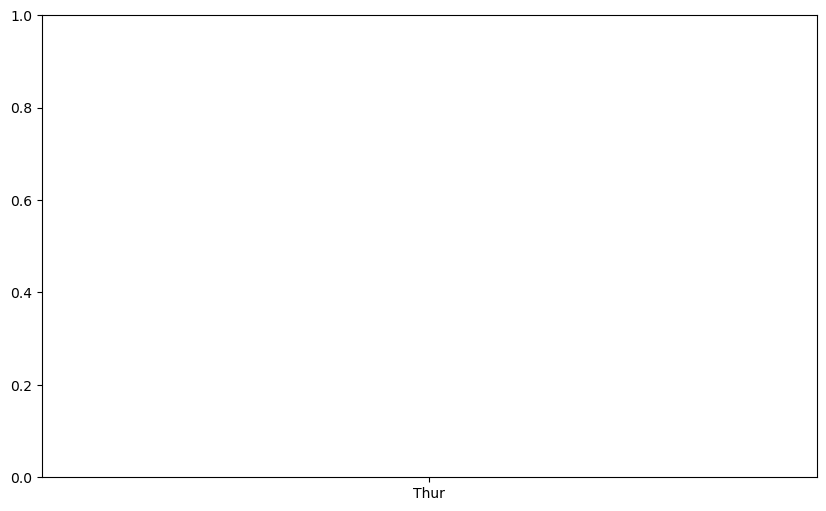

In [36]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='day', y='total_bill', data=tips, palette='Set2', size=4) # size 调整点的大小
plt.title('Total Bill by Day (Swarm Plot - All Data Points)')
plt.ylabel("Total Bill ($)")
plt.xlabel("Day of the Week")
plt.show()

# 可以和箱线图/小提琴图叠加
plt.figure(figsize=(10, 6))
sns.violinplot(x='day', y='total_bill', data=tips, palette='lightgray', inner=None) # inner=None 去掉小提琴内部
sns.swarmplot(x='day', y='total_bill', data=tips, color='black', size=3, alpha=0.7)
plt.title('Total Bill by Day (Violin + Swarm Plot)')
plt.ylabel("Total Bill ($)")
plt.xlabel("Day of the Week")
plt.show()

#### 6.4.2 点图 (Point Plot): 显示均值和置信区间，强调变化趋势

点图用点的位置表示均值，并通过线条连接不同类别的均值点，可以更清晰地看出均值随类别变化的趋势，尤其适合有序分类变量。

Python

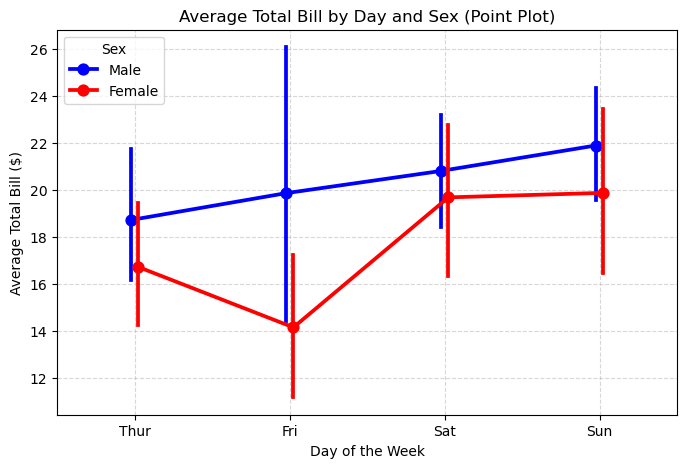

In [37]:
plt.figure(figsize=(8, 5))
sns.pointplot(x='day', y='total_bill', hue='sex', data=tips, palette={'Male':'blue', 'Female':'red'}, dodge=True)
# dodge=True 使不同hue的点和线错开，避免重叠
plt.title('Average Total Bill by Day and Sex (Point Plot)')
plt.ylabel("Average Total Bill ($)")
plt.xlabel("Day of the Week")
plt.legend(title='Sex')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 6.5 选择原则总结

- 想比较各组的平均水平/总和：
  - **条形图 (`sns.barplot`)** 是首选。
  - **点图 (`sns.pointplot`)** 强调均值间的趋势变化。
- 想比较各组的整体分布 (中位数、范围、形状、异常值)：
  - **箱线图 (`sns.boxplot`)** 提供清晰的五数概括和异常值。
  - **小提琴图 (`sns.violinplot`)** 额外展示分布的密度形状。
- 想看到每个原始数据点 (数据量不大时)：
  - **散点图/条带图 (`sns.stripplot`)** 直接展示，可能有重叠。
  - **蜂群图 (`sns.swarmplot`)** 展示所有点并避免重叠。
- 有多个分类变量需要交叉比较：
  - **分组图 (使用 `hue` 参数)：** 如分组条形图、分组箱线图。
  - **分面图 (`sns.catplot` with `col`/`row`)：** 更清晰地展示多组比较。

### 6.6 实战案例 (思路)

1. 不同品牌手机价格比较:

   - **数据:** `brand` (分类), `price` (数值)。
   - 图表:
     - 箱线图/小提琴图：比较各品牌手机价格的分布、中位数、价格区间。
     - 如果还想看各品牌下不同型号的数量，可以用条形图展示各品牌手机型号计数。
   - **解读:** 哪个品牌均价最高/最低？哪个品牌价格区间最广？哪个品牌高端/低端机型多？

2. 各地区销售业绩分析:

   - **数据:** `region` (分类), `sales_amount` (数值)。可能还有 `product_category` (分类)。

   - 图表:

     - 单分类 (`region` vs `sales_amount`): 条形图看各地区总销售额/平均销售额；箱线图看各地区销售额分布。

     - 多分类 (

       ```
       region
       ```

        vs 

       ```
       sales_amount
       ```

        with 

       ```
       hue='product_category'
       ```

        or faceted by 

       ```
       product_category
       ```

       ):

       - 分组条形图：比较各地区不同产品类别的销售额。
       - 分面箱线图：详细比较各地区、各产品类别下的销售额分布。

   - **解读:** 哪个地区业绩最好？不同产品类别在各地区的销售表现如何？是否存在地区性的销售明星产品？

------

## 第七讲：时间序列数据 - 趋势与周期性 ⏳📈

**核心目标:** 当数据中包含时间戳信息时，我们的主要目的是分析数值如何随时间变化，识别趋势、周期性、季节性以及异常点。

### 7.1 数据特征：有时间列

关键在于将时间列正确处理为Pandas的 `datetime` 对象，并通常将其设为索引，以便利用Pandas强大的时间序列功能。

**示例数据:**

Python

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose # 用于时间序列分解

# 创建示例时间序列数据
np.random.seed(0)
date_rng = pd.date_range(start='2022-01-01', end='2024-12-31', freq='M') # 按月频率
ts_data = pd.DataFrame(date_rng, columns=['date'])
ts_data['value'] = np.random.randn(len(ts_data)) * 10 + \
                 50 + \
                 np.linspace(0, 30, len(ts_data)) + \
                 np.sin(np.linspace(0, 3*np.pi, len(ts_data))) * 15 # 随机性 + 趋势 + 季节性
ts_data['category'] = np.random.choice(['Product A', 'Product B'], size=len(ts_data))

# 时间数据处理
ts_data['date'] = pd.to_datetime(ts_data['date']) # 确保是datetime类型
df_ts_indexed = ts_data.set_index('date') # 将date列设为索引

# 示例：用于堆叠面积图的多系列数据
dates_stack = pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'])
series1 = [10, 12, 15, 13]
series2 = [5, 8, 7, 10]
series3 = [3, 4, 6, 5]
```

### 7.2 基础时间图表

- 单系列时间序列折线图:

   最基础也最常用的时间序列图。

  Python

  ```
  plt.figure(figsize=(12, 6))
  plt.plot(df_ts_indexed.index, df_ts_indexed['value'], label='Single Series Value')
  # 或者如果已经是索引： plt.plot(df_ts_indexed['value'])
  plt.title('Time Series Plot of Value Over Time')
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.legend()
  plt.grid(True, linestyle=':', alpha=0.6)
  plt.show()
  ```

- 多系列比较折线图 (使用 Seaborn):

  Python

  ```
  plt.figure(figsize=(12, 6))
  # 使用原始的 ts_data，因为 date 是列而不是索引
  sns.lineplot(data=ts_data, x='date', y='value', hue='category', marker='.')
  plt.title('Time Series Plot by Category')
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.legend(title='Product Category')
  plt.grid(True, linestyle=':', alpha=0.6)
  plt.show()
  ```

### 7.3 高级时间可视化

#### 7.3.1 面积图：强调累积效应或总量随时间的变化

面积图是折线图的一种变体，其中折线下方到x轴之间的区域被填充颜色。

- 单系列面积图:

  Python

  ```
  plt.figure(figsize=(12, 6))
  plt.fill_between(df_ts_indexed.index, df_ts_indexed['value'], color="skyblue", alpha=0.4, label='Value Area')
  plt.plot(df_ts_indexed.index, df_ts_indexed['value'], color="Slateblue", alpha=0.8, linewidth=2, label='Value Line') # 可以叠加上折线
  plt.title('Area Chart of Value Over Time')
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.legend()
  plt.show()
  ```

  - **何时用:** 当你想强调数量或总量的变化时，例如网站总访问量、累计销售额。

#### 7.3.2 堆叠面积图：展示多系列构成部分随时间的变化及其总和

堆叠面积图将多个时间序列堆叠起来，每个序列的起点是前一个序列的终点。它既能显示每个部分的贡献，也能显示总量的变化。

Python

```
plt.figure(figsize=(10, 6))
plt.stackplot(dates_stack, series1, series2, series3,
              labels=['Product X', 'Product Y', 'Product Z'],
              colors=['lightcoral', 'lightskyblue', 'lightgreen'],
              alpha=0.7)
plt.title('Stacked Area Chart of Product Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(loc='upper left')
plt.xticks(dates_stack) #确保日期都显示
plt.show()

# 如果数据在DataFrame中，需要先透视或准备好
# 假设 df_stacked 有 'date', 'category', 'value' 列
# df_pivot = df_stacked.pivot(index='date', columns='category', values='value').fillna(0)
# plt.stackplot(df_pivot.index, df_pivot.T.values, labels=df_pivot.columns)
# plt.show()
```

- 何时用:
  - 分析整体中各个组成部分随时间的变化趋势。
  - 了解各部分对总量的贡献比例。
  - 例如：不同产品线销售额占总销售额的构成、不同能源类型的消耗量。
- **注意:** 类别不宜过多，否则难以辨认。基线（最下方的序列）比较容易解读，上方的序列其形状受下方序列影响。

### 7.4 季节性、趋势和残差分析 (Time Series Decomposition)

时间序列通常可以分解为几个组成部分：

- **趋势 (Trend):** 数据长期的上升或下降方向。
- **季节性 (Seasonality):** 在固定时间间隔内（如年、月、周）发生的周期性波动。
- **残差 (Residual/Noise):** 除去趋势和季节性后剩余的随机波动。

`statsmodels` 库提供了 `seasonal_decompose` 函数来进行这种分解。

Python

```
# 确保df_ts_indexed的索引是DatetimeIndex且有固定频率 (例如 'M' for monthly)
# 我们之前创建的 df_ts_indexed['value'] 是月度数据，可以直接使用
monthly_series = df_ts_indexed['value'].asfreq('M') # 确保频率，并处理可能的缺失（这里不会有）

# 加法模型分解 (假设季节性影响是加性的)
decomposition_add = seasonal_decompose(monthly_series, model='additive', period=12) # period=12 表示年度季节性

# 乘法模型分解 (假设季节性影响是乘性的，通常用于波动随趋势增大的序列)
# 如果数据都是正数，可以尝试乘法模型
# decomposition_mul = seasonal_decompose(monthly_series, model='multiplicative', period=12)

plt.rcParams['figure.figsize'] = (10, 8) # 调整默认图像大小以适应多个子图
fig_add = decomposition_add.plot()
fig_add.suptitle('Additive Decomposition of Time Series', y=0.93)
plt.show()

# plt.rcParams.update(plt.rcParamsDefault) # 恢复默认图像大小 (如果需要)
```

- 解读分解图:
  - **Observed:** 原始时间序列。
  - **Trend:** 提取出的趋势成分。
  - **Seasonal:** 提取出的季节性成分。
  - **Resid:** 残差部分。理想情况下，残差应为白噪声（无明显模式）。
- 何时用:
  - 深入理解时间序列的内在结构。
  - 去除季节性影响以观察真实趋势。
  - 预测模型的预处理步骤。

### 7.5 实战案例 (思路)

1. 股票价格分析:
   - **数据:** 每日股票开盘/收盘价、最高/最低价、成交量。
   - 图表:
     - 收盘价折线图：观察长期趋势和主要波动。
     - **K线图 (Candlestick Chart):** 更专业，同时展示开、高、低、收价格（需要 `mplfinance` 等库）。
     - 成交量柱状图：通常与价格图放在一起，看价量关系。
     - 移动平均线：在价格折线图上叠加短期和长期移动平均线，观察金叉/死叉信号。
     - 时间序列分解：分析股价的趋势和可能的（尽管股市季节性不强）周期性。
   - **解读:** 股价是上涨、下跌还是盘整？波动性如何？是否有明显的支撑/阻力位？
2. 网站访问量趋势:
   - **数据:** 每日/每周/每月网站独立访客数(UV)、页面浏览量(PV)。
   - 图表:
     - UV/PV 折线图：观察整体增长趋势。
     - 时间序列分解：识别年度季节性（如电商节假日高峰）、周季节性（工作日vs周末）。
     - 堆叠面积图：如果按流量来源（直接访问、搜索、社交媒体等）划分，可以看各来源贡献的变化。
   - **解读:** 网站流量是增长还是下降？是否有明显的旺季/淡季？营销活动是否带来流量高峰？
3. 疫情数据可视化 (例如每日新增确诊):
   - **数据:** 每日新增确诊/死亡/康复人数。
   - 图表:
     - 新增确诊折线图：观察疫情发展曲线。
     - 7日移动平均线：平滑每日波动，更清晰地显示趋势。
     - 堆叠面积图：如果按地区划分，可以看各地区疫情发展的贡献。
   - **解读:** 疫情是处于上升期、平台期还是下降期？防控措施是否有效？

------

## 第八讲：综合决策与实战演练 🚀

**核心目标:** 巩固前面所学的知识，通过练习和案例，培养独立根据数据特点选择合适图表并进行优化的能力。同时，了解常见错误，学习图表美化技巧。

### 8.1 数据类型快速识别练习 (理论)

**场景1：** 你拿到一份销售订单数据，包含 `订单ID`, `产品名称`, `销售数量`, `单价`, `订单总额`, `客户所在城市`, `下单日期`。

- 快速分析：
  - `订单ID`: 通常是唯一标识符，分类型 (或视为索引)。
  - `产品名称`: 分类型。
  - `销售数量`: 数值型 (离散)。
  - `单价`: 数值型 (连续)。
  - `订单总额`: 数值型 (连续) - 通常是 `销售数量 * 单价`。
  - `客户所在城市`: 分类型。
  - `下单日期`: 时间序列型。
- 可能的分析与图表：
  - 不同`产品名称`的`订单总额`分布：箱线图/小提琴图。
  - 不同`客户所在城市`的`订单总额`均值：条形图。
  - `订单总额`随`下单日期`的变化：折线图。
  - `销售数量`与`订单总额`的关系：散点图 (预期强正相关)。
  - 各`产品名称`的`销售数量`占比：饼图 (如果产品种类不多) 或排序条形图。

**场景2：** 你有一份用户调研问卷数据，包含 `用户ID`, `年龄`, `性别`, `教育程度` (小学/中学/大学/硕士/博士), `对产品的满意度` (1-5分), `是否会推荐给他人` (是/否)。

- 快速分析：
  - `用户ID`: 唯一标识符。
  - `年龄`: 数值型 (连续或离散)。
  - `性别`: 分类型 (无序)。
  - `教育程度`: 分类型 (有序)。
  - `对产品的满意度`: 数值型 (离散，也可视为有序分类)。
  - `是否会推荐给他人`: 分类型 (二分)。
- 可能的分析与图表：
  - `年龄`分布：直方图/密度图。
  - 不同`性别`的`满意度`均值/分布：条形图/箱线图。
  - 不同`教育程度`的`满意度`分布：箱线图 (考虑到有序性)。
  - `满意度`与`年龄`的关系：可能不明显，但可以尝试散点图，或将年龄分段后用箱线图。
  - `是否会推荐给他人`在不同`性别`/`教育程度`下的比例：分组/堆叠条形图。

**(建议：** 找一些公开数据集，例如 Kaggle 上的 Titanic, House Prices, Iris 等，让学生自行判断变量类型并思考可以绘制哪些图表及其目的。)**

### 8.2 常见错误与避免 ❌

1. 柱状图 (Bar Chart) vs 直方图 (Histogram) 混淆:
   - **柱状图:** 用于比较**分类**变量的计数或某个数值聚合量（如均值）。X轴是离散的类别，柱子间通常有间隙。
   - **直方图:** 用于显示**单个数值**变量的频率分布。X轴是连续的数值区间（bins），柱子间通常无间隙。
   - **避免：** 明确你的X轴是类别还是连续的数值区间。
2. 3D图表滥用:
   - 虽然3D图（尤其是3D柱状图、3D饼图）看起来“炫酷”，但往往降低了信息的可读性，容易造成遮挡和错误的视觉比较。
   - **避免：** 除非第三维是真正的空间维度且对理解至关重要 (如3D散点图)，否则优先选择2D图表。对于三个变量，气泡图、颜色编码的散点图通常更清晰。
3. 颜色使用不当:
   - **颜色过多：** 超过5-7种颜色会让图表难以辨认，尤其是在表示分类时。
   - **对比度不足：** 前景色和背景色、不同系列间的颜色对比度不够，看不清。
   - **无意义的颜色：** 随机使用颜色，而不是用颜色来编码信息。
   - **不考虑色盲用户：** 使用红绿色盲难以区分的颜色组合。
   - 避免：
     - 使用清晰、有区分度的调色板 (Seaborn有很多内置好用的调色板)。
     - 确保颜色有意义（例如，用颜色强度表示数值大小，用不同颜色表示不同类别）。
     - 测试图表在灰度模式下的可读性。
     - 使用 ColorBrewer 等工具选择色盲友好的调色板。
4. 饼图滥用:
   - 当类别过多（超过5个）或各类别占比相近时，饼图很难准确比较大小。人类对角度的感知不如对长度的感知精确。
   - **避免：** 类别少且想强调部分与整体的关系时可用。多数情况下，条形图是更好的替代。
5. 双Y轴图表的误导:
   - 如果两个Y轴的刻度范围选择不当，很容易夸大或缩小两个序列间的关系。
   - **避免：** 谨慎使用。如果必须用，确保清晰标明哪个序列对应哪个轴，并思考刻度是否合理。有时分成两个独立的图可能更清晰。
6. 忽略数据量和密度:
   - 在散点图上，大量数据点重叠会掩盖真实分布。
   - **避免：** 对于大数据量的散点图，使用透明度 (`alpha`)、六边形分箱图 (`hexbin`) 或2D密度图 (`kdeplot`)。

### 8.3 图表优化技巧 ✨

一个好的图表不仅能传递信息，还应该易于理解和美观。

1. 标题和标签完整性 (Title and Labels):

   - **图表标题 (Title):** 清晰、简洁地概括图表的主要内容/结论。

   - **轴标签 (Axis Labels):** X轴和Y轴必须有明确的标签，说明变量名称和单位（如果适用）。

   - 示例:

     Python

     ```
     plt.title('Monthly Average Temperature in London (2023)', fontsize=16)
     plt.xlabel('Month', fontsize=12)
     plt.ylabel('Average Temperature (°C)', fontsize=12)
     ```

2. 颜色和对比度 (Color and Contrast):

   - 选择合适的调色板 (

     ```
     cmap
     ```

      in Matplotlib/Seaborn)。

     - **分类数据:** 使用 `qualitative` 调色板 (如 `Set1`, `Paired`, `tab10`)。
     - **顺序数据:** 使用 `sequential` 调色板 (如 `Blues`, `viridis`, `OrRd`)，颜色由浅到深。
     - **发散数据 (有中心点，向两边发散):** 使用 `diverging` 调色板 (如 `coolwarm`, `RdBu_r`)。

   - 确保文本颜色与背景有足够对比度。

3. 图例 (Legend):

   - 当图表中有多个系列（用不同颜色或标记表示）时，必须有图例。

   - 图例应清晰，位置不应遮挡重要数据。Seaborn通常会自动处理，但有时需要手动调整 (`plt.legend(loc='best')` 或指定位置)。

   - Python

     ```
       # sns.lineplot(data=df, x='time', y='value', hue='category')
       # plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.2, 1)) # 调整图例位置到图外
     ```

4. 刻度与网格线 (Ticks and Gridlines):

   - **刻度 (Ticks):** X轴和Y轴的刻度应易于阅读，不要过于密集或稀疏。日期刻度可能需要特殊格式化。

   - **网格线 (Gridlines):** 适当使用网格线可以帮助读者更好地定位和比较数值，但不要让网格线过于突出，以免喧宾夺主。

   - Python

     ```
       # plt.xticks(rotation=45, ha='right') # 旋转X轴刻度标签
       # from matplotlib.ticker import MaxNLocator
       # ax.yaxis.set_major_locator(MaxNLocator(integer=True)) # Y轴刻度设为整数
       # plt.grid(True, linestyle='--', alpha=0.7, axis='y') # 只显示水平网格线
     ```

5. 减少图表噪音 (Decluttering):

   - 移除不必要的边框、背景色、过多的装饰元素。
   - 简洁就是美。图表的目标是清晰传达信息。

6. 标注重要信息 (Annotations):

   - 如果图表中有特别的点、趋势或发现，可以使用文本、箭头进行标注。

   - Python

     ```
       # plt.annotate('Peak Sales!', xy=(peak_date, peak_value), xytext=(peak_date, peak_value+10),
       #              arrowprops=dict(facecolor='black', shrink=0.05),
       #              fontsize=10, color='red')
     ```

7. 一致性 (Consistency):

   - 如果在一份报告或仪表盘中使用多个图表，尽量保持风格一致（字体、颜色、布局等）。

8. 选择合适的图表尺寸和长宽比 (`figsize`):

   - 根据图表内容和展示媒介调整。时间序列图通常更长，比较类别的图可能更宽。
   - `plt.figure(figsize=(width, height))`

Seaborn 风格:

Seaborn 提供了一些预设的风格，可以快速改善图表外观。

Python

```
# sns.set_theme(style="whitegrid") # 设置一个主题
# sns.set_context("talk") # 设置图表元素的大小，适合演讲 ("paper", "notebook", "talk", "poster")
# ... 你的绘图代码 ...
```

### 8.4 综合案例实战 (思路与代码框架)

#### A. 电商数据多维分析

假设数据 (ecommerce_df):

OrderID, UserID, OrderDate, ProductCategory, ProductName, Quantity, UnitPrice, TotalAmount, UserCity, UserSegment (e.g., New, Regular, VIP)

**分析目标与可视化：**

1. 整体销售趋势：

   - `OrderDate` (按月/周聚合) vs `TotalAmount` (总和)。

   - **图表：** 折线图，面积图。

   - Python

     ```
       # ecommerce_df['OrderMonth'] = ecommerce_df['OrderDate'].dt.to_period('M')
       # monthly_sales = ecommerce_df.groupby('OrderMonth')['TotalAmount'].sum()
       # monthly_sales.index = monthly_sales.index.to_timestamp() # 转回datetime方便绘图
       # plt.figure(figsize=(12,6))
       # monthly_sales.plot(kind='line', marker='o')
       # plt.title('Monthly Sales Trend')
       # plt.show()
     ```

2. 不同产品类别的销售表现：

   - `ProductCategory` vs `TotalAmount` (总和/均值)。

   - **图表：** 条形图 (总销售额)，箱线图 (订单金额分布)。

   - Python

     ```
       # category_sales = ecommerce_df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)
       # plt.figure(figsize=(10,7))
       # sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
       # plt.title('Total Sales by Product Category')
       # plt.xlabel('Total Sales Amount')
       # plt.show()
     
       # plt.figure(figsize=(12,7))
       # sns.boxplot(data=ecommerce_df, x='ProductCategory', y='TotalAmount', palette='Set3')
       # plt.title('Order Amount Distribution by Product Category')
       # plt.xticks(rotation=30, ha='right')
       # plt.show()
     ```

3. 用户画像分析 (城市、分层)：

   - `UserCity` vs `COUNT(DISTINCT UserID)` (用户数) 或 `SUM(TotalAmount)` (总消费)。

   - `UserSegment` vs `AVG(TotalAmount)` (平均订单价值)。

   - **图表：** 条形图，饼图 (如果城市/分层少)。

   - Python

     ```
       # city_sales = ecommerce_df.groupby('UserCity')['TotalAmount'].sum().nlargest(10) # Top 10 cities
       # plt.figure(figsize=(10,6))
       # sns.barplot(x=city_sales.index, y=city_sales.values)
       # plt.title('Top 10 Cities by Sales')
       # plt.xticks(rotation=45)
       # plt.show()
     
       # plt.figure(figsize=(8,5))
       # sns.barplot(data=ecommerce_df, x='UserSegment', y='TotalAmount', estimator=np.mean, ci='sd')
       # plt.title('Average Order Value by User Segment')
       # plt.show()
     ```

4. 高价值产品和用户行为：

   - `UnitPrice` vs `Quantity` 的散点图，用 `TotalAmount` 编码气泡大小或颜色。

   - `Quantity` vs `TotalAmount` 的散点图。

   - Python

     ```
       # sample_df = ecommerce_df.sample(n=500, random_state=1) # 如果数据量大，抽样
       # plt.figure(figsize=(10,7))
       # sns.scatterplot(data=sample_df, x='UnitPrice', y='Quantity', size='TotalAmount', hue='ProductCategory', alpha=0.6, sizes=(20,400))
       # plt.title('Product Price vs Quantity (Size by Total Order Amount)')
       # plt.xscale('log') # 如果价格范围广，可以考虑对数尺度
       # plt.yscale('log') # 如果数量范围广
       # plt.show()
     ```

#### B. 金融数据可视化报告 (例如股票分析)

假设数据 (stock_df):

Date, Open, High, Low, Close, Volume, StockSymbol

**分析目标与可视化：**

1. 股价走势与交易量：

   - `Date` vs `Close` (折线图)。

   - `Date` vs `Volume` (柱状图)。通常将两者上下并列。

   - **高级：** K线图 (Candlestick) - 需要 `mplfinance` 库。

   - Python

     ```
       # import mplfinance as mpf
       # stock_df_subset = stock_df[stock_df['StockSymbol'] == 'AAPL'].set_index('Date').tail(100) # 选一个股票，设日期为索引，取最近100天
       # mpf.plot(stock_df_subset, type='candle', style='yahoo',
       #          title='AAPL Candlestick Chart (Last 100 Days)',
       #          ylabel='Price ($)',
       #          volume=True, ylabel_lower='Volume',
       #          figsize=(12,8))
       # plt.show()
     ```

2. 收益率分布：

   - 计算每日收益率: `(Close - Prev_Close) / Prev_Close` 或 `log(Close / Prev_Close)`。

   - 对收益率数据绘制直方图/密度图。

   - Python

     ```
       # stock_df_subset['DailyReturn'] = stock_df_subset['Close'].pct_change()
       # plt.figure(figsize=(10,5))
       # sns.histplot(stock_df_subset['DailyReturn'].dropna(), kde=True, bins=50)
       # plt.title('AAPL Daily Returns Distribution')
       # plt.show()
     ```

3. 多股票比较：

   - 标准化股价 (例如，从期初的1开始) 后，在同一张图上绘制多个股票的折线图。

   - 相关性热力图 (基于每日收益率)。

   - Python

     ```
       # # 假设 all_stocks_df 有多个股票的收盘价，以Date为索引，StockSymbol为列名
       # normalized_prices = all_stocks_df.apply(lambda x: (x / x.iloc[0] * 100)) # 标准化
       # plt.figure(figsize=(12,7))
       # sns.lineplot(data=normalized_prices)
       # plt.title('Normalized Stock Price Comparison')
       # plt.ylabel('Price (Normalized to 100 at Start)')
       # plt.show()
     
       # returns_df = all_stocks_df.pct_change().dropna()
       # correlation_matrix = returns_df.corr()
       # plt.figure(figsize=(8,6))
       # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
       # plt.title('Stock Returns Correlation Matrix')
       # plt.show()
     ```

#### C. 社交媒体数据洞察 (例如推文分析)

假设数据 (tweets_df):

TweetID, UserID, Timestamp, Text, Likes, Retweets, FollowerCount (发推者的粉丝数), SentimentScore (-1 to 1)

**分析目标与可视化：**

1. 发帖时间模式：

   - 按小时/星期几聚合 `COUNT(TweetID)`。

   - **图表：** 条形图 (每小时/每日发帖量)，热力图 (星期几 vs 小时，颜色为发帖量)。

   - Python

     ```
       # tweets_df['Hour'] = tweets_df['Timestamp'].dt.hour
       # tweets_df['DayOfWeek'] = tweets_df['Timestamp'].dt.day_name()
       # hourly_activity = tweets_df.groupby('Hour').size()
       # plt.figure(figsize=(10,5))
       # sns.barplot(x=hourly_activity.index, y=hourly_activity.values)
       # plt.title('Tweet Activity by Hour of Day')
       # plt.show()
     
       # activity_pivot = tweets_df.pivot_table(index='DayOfWeek', columns='Hour', values='TweetID', aggfunc='count').fillna(0)
       # days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
       # activity_pivot = activity_pivot.reindex(days_order)
       # plt.figure(figsize=(12,7))
       # sns.heatmap(activity_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
       # plt.title('Tweet Activity Heatmap (Day of Week vs Hour)')
       # plt.show()
     ```

2. 互动与内容关系：

   - `SentimentScore` 分布：直方图。

   - `SentimentScore` vs `Likes`/`Retweets` (均值)：条形图 (将情感分段) 或散点图 (可能有噪音)。

   - `FollowerCount` vs `Likes`/`Retweets`：散点图 (可加趋势线)。

   - Python

     ```
       # plt.figure(figsize=(8,5))
       # sns.histplot(tweets_df['SentimentScore'], kde=True, bins=20)
       # plt.title('Distribution of Tweet Sentiment Scores')
       # plt.show()
     
       # # 将情感分箱
       # tweets_df['SentimentBin'] = pd.cut(tweets_df['SentimentScore'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])
       # plt.figure(figsize=(10,6))
       # sns.barplot(data=tweets_df, x='SentimentBin', y='Likes', estimator=np.mean, order=['Negative', 'Neutral', 'Positive'])
       # plt.title('Average Likes by Tweet Sentiment')
       # plt.show()
     
       # plt.figure(figsize=(10,6))
       # sns.scatterplot(data=tweets_df.sample(1000, random_state=1), x='FollowerCount', y='Retweets', alpha=0.5, size='Likes', sizes=(10,200))
       # plt.xscale('log') # 粉丝数通常差异大
       # plt.yscale('log') # 转推数也可能差异大
       # plt.title('Follower Count vs Retweets (Size by Likes)')
       # plt.show()
     ```

------

## 速查手册 📋

### 常用代码模板

Python

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # For 3D plots
from pandas.plotting import parallel_coordinates # For parallel coordinates
from statsmodels.tsa.seasonal import seasonal_decompose # For time series

# --- 1. 数据加载与探索 ---
# df = pd.read_csv('your_data.csv')
# df = pd.read_excel('your_data.xlsx')

# 数据探索三件套
# print(df.head())
# print(df.info())
# print(df.describe(include='all'))
# print(df.dtypes)
# print(df.isnull().sum()) # 查看缺失值

# --- 2. 单个数值变量 ---
# sns.histplot(df['numerical_col'], kde=True, bins=30)
# plt.title('Distribution of Numerical Column')
# plt.show()

# sns.kdeplot(df['numerical_col'], fill=True)
# plt.title('Density of Numerical Column')
# plt.show()

# sns.boxplot(y=df['numerical_col']) # 或 x=df['numerical_col']
# plt.title('Boxplot of Numerical Column')
# plt.show()

# --- 3. 两个数值变量 ---
# # 无时间顺序
# sns.scatterplot(data=df, x='num_col1', y='num_col2', hue='optional_categorical_col')
# plt.title('Scatter Plot of NumCol1 vs NumCol2')
# plt.show()

# sns.regplot(data=df, x='num_col1', y='num_col2', scatter_kws={'alpha':0.5})
# plt.title('Regression Plot of NumCol1 vs NumCol2')
# plt.show()

# # 有时间顺序 (假设 'date_col' 是 x 轴, 'value_col' 是 y 轴)
# df['date_col'] = pd.to_datetime(df['date_col']) # 确保是datetime
# sns.lineplot(data=df, x='date_col', y='value_col', hue='optional_categorical_col', marker='o')
# plt.title('Time Series Plot')
# plt.xticks(rotation=45)
# plt.show()

# --- 4. 三个数值变量 ---
# # 气泡图 (第三维用大小)
# sns.scatterplot(data=df, x='num_col1', y='num_col2', size='num_col3_size', hue='optional_categorical_col', sizes=(20, 400), alpha=0.7)
# plt.title('Bubble Chart')
# plt.show()

# # 颜色映射 (第三维用颜色)
# sns.scatterplot(data=df, x='num_col1', y='num_col2', hue='num_col3_color', palette='viridis', s=50, alpha=0.7)
# plt.title('Scatter with Color Mapping')
# plt.show()

# # 3D散点图
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['num_col1'], df['num_col2'], df['num_col3_z'], c=df.get('optional_color_col', None), cmap='viridis')
# ax.set_xlabel('NumCol1'); ax.set_ylabel('NumCol2'); ax.set_zlabel('NumCol3_Z')
# plt.title('3D Scatter Plot')
# plt.show()

# --- 5. 多个数值变量 ---
# # 相关性热力图
# numeric_df = df.select_dtypes(include=np.number) # 选择数值列
# corr_matrix = numeric_df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()

# # 成对图
# sns.pairplot(df, hue='optional_categorical_col', diag_kind='kde') # diag_kind can be 'hist'
# plt.suptitle('Pair Plot', y=1.02)
# plt.show()

# # 平行坐标图
# # from pandas.plotting import parallel_coordinates
# # plt.figure(figsize=(12,6))
# # parallel_coordinates(df[['num1','num2','num3','num4','categorical_col_for_color']], 'categorical_col_for_color', colormap='viridis')
# # plt.title('Parallel Coordinates Plot')
# # plt.show()

# --- 6. 分类变量 + 数值变量 ---
# # 条形图 (比较均值)
# sns.barplot(data=df, x='categorical_col', y='numerical_col', hue='optional_grouping_col', ci='sd')
# plt.title('Bar Plot: Average of Numerical by Categorical')
# plt.xticks(rotation=30, ha='right')
# plt.show()

# # 箱线图 (比较分布)
# sns.boxplot(data=df, x='categorical_col', y='numerical_col', hue='optional_grouping_col')
# plt.title('Box Plot: Distribution of Numerical by Categorical')
# plt.xticks(rotation=30, ha='right')
# plt.show()

# # 小提琴图 (比较分布形状)
# sns.violinplot(data=df, x='categorical_col', y='numerical_col', hue='optional_grouping_col', inner='quartile')
# plt.title('Violin Plot: Distribution of Numerical by Categorical')
# plt.xticks(rotation=30, ha='right')
# plt.show()

# # 分面图 (catplot)
# sns.catplot(data=df, x='categorical_col1', y='numerical_col', col='categorical_col2', kind='bar', height=4, aspect=1.2) # kind can be box, violin, etc.
# plt.show()

# --- 7. 时间序列数据 ---
# # (已在 "两个数值变量" 中包含基础线图)
# # 面积图
# plt.fill_between(df.index, df['value_col'], alpha=0.3) # Assuming df.index is datetime
# plt.plot(df.index, df['value_col'])
# plt.title('Area Chart')
# plt.show()

# # 堆叠面积图 (需要数据准备成每列一个序列，行为时间点)
# # plt.stackplot(dates, series1, series2, labels=['S1','S2'])
# # plt.show()

# # 时间序列分解
# # df_ts = df.set_index('date_col')['value_col'].asfreq('M') # Ensure regular frequency
# # decomposition = seasonal_decompose(df_ts, model='additive', period=12)
# # decomposition.plot()
# # plt.show()

# --- 8. 图表优化 ---
# plt.xlabel('X-axis Label', fontsize=12)
# plt.ylabel('Y-axis Label (Unit)', fontsize=12)
# plt.legend(title='Legend Title', loc='best') # 'upper right', 'lower left', etc.
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout() # Adjusts plot to prevent labels from being cut off
# # sns.set_theme(style="whitegrid", context="talk") # Example theme
# # plt.savefig('my_plot.png', dpi=300) # Save the plot
```

### 图表选择决策表 (复习)

| **我的数据是... (变量类型和数量)** | **我想看... (分析目的)**                | **用这个图 (推荐图表)**    | **Python 代码 (主要函数)**                                   |
| ---------------------------------- | --------------------------------------- | -------------------------- | ------------------------------------------------------------ |
| 一列数字                           | 分布形状、集中趋势、离散程度、异常值    | 直方图 / 密度图 / 箱线图   | `plt.hist()`, `sns.histplot()`, `sns.kdeplot()`, `sns.boxplot()` |
| 两列数字，无时间/顺序关系          | 相关关系、聚类                          | 散点图                     | `plt.scatter()`, `sns.scatterplot()`, `sns.regplot()`        |
| 两列数字，有时间/顺序关系          | 随时间/顺序的变化趋势                   | 折线图                     | `plt.plot()`, `sns.lineplot()`                               |
| 一列数字 + 一列分类                | 不同组间的均值/中位数/分布差异          | 条形图 / 箱线图 / 小提琴图 | `sns.barplot()`, `sns.boxplot()`, `sns.violinplot()`         |
| 多列数字 (≥3-4)                    | 变量两两间的相关性、整体模式            | 热力图 / 成对图 / 平行坐标 | `sns.heatmap()`, `sns.pairplot()`, `parallel_coordinates()`  |
| 两列分类                           | 两个分类变量组合的频数/占比             | 分组/堆叠条形图, 热力图    | `sns.countplot(hue=...)`, `pd.crosstab()`, `sns.heatmap()`   |
| 时间序列数据                       | 趋势、季节性、周期性                    | 折线图, 面积图, 分解图     | `plt.plot()`, `seasonal_decompose()`                         |
| 三列数字                           | 三维关系 (一个维度用大小/颜色/空间表示) | 气泡图 / 颜色散点图 / 3D图 | `plt.scatter(s=...)`, `plt.scatter(c=...)`, `Axes3D.scatter()` |

------

## 课后作业 ✍️

**要求：** 针对每讲（或选择其中3-5讲的核心图表类型）找到或创建一个小型实际数据集。

1. 数据探索与类型识别:
   - 加载数据。
   - 使用 `df.info()`, `df.describe()`, `df.dtypes` 检查数据。
   - 明确指出你打算分析的变量及其数据类型。
2. 选择合适的图表:
   - 根据变量类型和你的分析目的，从当讲内容或速查表中选择1-2个最合适的图表。
3. Python代码实现:
   - 使用 Matplotlib 和/或 Seaborn 绘制所选图表。
4. 解释选择理由与图表解读:
   - 简要说明为什么选择这个/这些图表 (它们能帮你回答什么问题？)。
   - 解读图表，从中你观察到了什么信息或模式？
5. 图表优化 (至少应用2-3条优化技巧):
   - 添加清晰的标题、轴标签。
   - 调整颜色、图例（如果适用）。
   - 确保图表易于理解。

**数据集建议 (可从Kaggle, UCI Machine Learning Repository, 或Seaborn自带数据集获取):**

- **单数值:** 房价、学生成绩、产品评分。
- 双数值:
  - 无序: 汽车马力与油耗、房屋面积与价格。
  - 有序: 每日气温变化、股票价格。
- **三数值/多数值:** 鸢尾花(Iris)数据集、红酒品质(Wine Quality)数据集。
- **分类+数值:** 小费(Tips)数据集、泰坦尼克号(Titanic)数据集。
- **时间序列:** 股票数据、天气数据、航空公司乘客数据。

**提交格式：** 推荐使用 Jupyter Notebook，包含代码、图表输出和文字解释。